# Project: ML Model Predicting the Recovery of Gold 

Intro: Mined ore undergoes primary processing called flotation, which is a technique in which an ore mixture or rougher feed is fed to flotation (also known as the rougher process). After flotation, the material is sent to two-stage purification. After the process of flotation and purification, calculations for the recovery coefficient of gold are made to calculate the concentrate of this metal. 

The purpose of this project was to create a machine learning model that predicts the recovery coefficient of gold after the flotation and the purification processes. 

## Libraries Used for Analyss

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
import itertools
from sklearn.dummy import DummyRegressor

%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

## Importing the Data files 
In this section, we imported the training, testing, and the original source dataset files and converted them into dataframes. The original source dataset contains both the training and the testing datasets. 

### source_data 
The `source_data` dataframe contained the entries from both the train_data and test_data. The source data contained a total of 87 columns and 22,716 entries. The distribution of null values for each of the columns is summarized in the  `missing_source` Series, in the `source_data preprocessing` section. 

In [2]:
source_data=pd.read_csv('/datasets/gold_recovery_full.csv')
source_data.head(15)


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [3]:
source_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


#### source_data preprocessing
In this section we corrected errors in the data, such as fixing the datatype of the columns and fixed the missing values in the columns. 

##### fixing datatype for the columns in source_data
In this section, all of the columns, with the exception of the __date__ column, had correct datatype of float64. However, the __date__ column was changed to datetime64[ns]. 

In [4]:
source_data['date'] = pd.to_datetime(source_data['date'], format='%Y-%m-%d %H:%M:%S')
source_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                22716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         22627 non-null  float64       
 2   final.output.concentrate_pb                         22629 non-null  float64       
 3   final.output.concentrate_sol                        22331 non-null  float64       
 4   final.output.concentrate_au                         22630 non-null  float64       
 5   final.output.recovery                               20753 non-null  float64       
 6   final.output.tail_ag                                22633 non-null  float64       
 7   final.output.tail_pb                                22516 non-null  float64       
 8   final.

##### fixing the missing values 
In this section, we analyzed the missing values for the columns in the `source_data` dataframe. The __missing_source__ Series summarizes the percentage of missing values in each column of the `source_data` dataframe. The columns with the highest amount of missing values include 
- rougher.output.recovery with      13.73% 
- rougher.output.tail_ag             12.04% 
- rougher.output.tail_au             12.04%
- rougher.output.tail_sol            12.04%
- rougher.input.floatbank11_xanthate 9.93 %

The columns with no missing values included 
- primary_cleaner.input.feed_size
- date 

In [5]:
missing_source=source_data.isna().mean().sort_values(ascending=False)*100
pd.set_option('display.max_rows', 500)
missing_source


rougher.output.recovery                               13.730410
rougher.output.tail_ag                                12.048776
rougher.output.tail_au                                12.044374
rougher.output.tail_sol                               12.044374
rougher.input.floatbank11_xanthate                     9.935728
secondary_cleaner.output.tail_sol                      9.750836
final.output.recovery                                  8.641486
rougher.calculation.au_pb_ratio                        7.162353
primary_cleaner.input.sulfate                          7.083113
primary_cleaner.input.depressant                       6.805776
rougher.input.floatbank10_sulfate                      5.727241
primary_cleaner.input.xanthate                         5.066913
primary_cleaner.output.concentrate_sol                 3.512942
rougher.input.floatbank11_sulfate                      2.984680
rougher.state.floatbank10_e_air                        2.729354
rougher.input.feed_rate                 

To fix the problem of missing values, we first dropped the rows with missing values in the target columns and then we used the method ffill, whih filled the null values with a previous Non-Null value. The reason we filled these null values with the previous non-null values was because the instructions stated that ' Parameters that are next to each other in terms of time are often similar.'

In [6]:
#dropping rows with missing values in the target columns

rougher_drop_index=source_data.loc[source_data['rougher.output.recovery'].isna()].index.to_list()
source_data=source_data.drop(rougher_drop_index)
final_drop_index=source_data.loc[source_data['final.output.recovery'].isna()].index.to_list()
source_data=source_data.drop(final_drop_index)
source_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19439 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19438 non-null  float64       
 2   final.output.concentrate_pb                         19438 non-null  float64       
 3   final.output.concentrate_sol                        19228 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19438 non-null  float64       
 7   final.output.tail_pb                                19338 non-null  float64       
 8   final.

In [7]:
source_data.ffill(axis = 0, inplace=True)
source_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19439 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19439 non-null  float64       
 2   final.output.concentrate_pb                         19439 non-null  float64       
 3   final.output.concentrate_sol                        19439 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19439 non-null  float64       
 7   final.output.tail_pb                                19439 non-null  float64       
 8   final.

### train_data
The `train_data` datframe has a total of 87 columns and 16,860 entries. The distribution of missing values is summarized in the __train_data preprocessing__ section. 

In [8]:
train_data=pd.read_csv('/datasets/gold_recovery_train.csv')
train_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


#### train_data preprocessing
In this section, we fixed errors in the `train_data` dataframe, such as fixing the datatype and the missing values in the columns. 

##### fixing datatype for the columns in train_data
In this section, all of the columns, with the exception of the __date__ column, had correct datatype of float64. However, the __date__ column was changed to datetime64[ns]. 

In [10]:
train_data['date'] = pd.to_datetime(train_data['date'], format='%Y-%m-%d %H:%M:%S')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16788 non-null  float64       
 2   final.output.concentrate_pb                         16788 non-null  float64       
 3   final.output.concentrate_sol                        16490 non-null  float64       
 4   final.output.concentrate_au                         16789 non-null  float64       
 5   final.output.recovery                               15339 non-null  float64       
 6   final.output.tail_ag                                16794 non-null  float64       
 7   final.output.tail_pb                                16677 non-null  float64       
 8   final.

##### fixing the missing values 
In this section, we analyzed the missing values for the columns in the `train_date` dataframe. The __missing_train__ Series summarizes the percentage of missing values in each column of the `train_data` dataframe. The columns with the highest amount of missing values include 
- rougher.output.recovery                               15.26%
- rougher.output.tail_ag                                13.34%
- rougher.output.tail_sol                               13.33%
- rougher.output.tail_au                                13.33%
- secondary_cleaner.output.tail_sol                     11.77%
- rougher.input.floatbank11_xanthate                    11.29%

The coluns with no missing values included 
- primary_cleaner.input.feed_size
- date 

In [11]:
#missing values in train_data
missing_train=train_data.isna().mean().sort_values(ascending=False)*100
pd.set_option('display.max_rows', 500)
missing_train


rougher.output.recovery                               15.260973
rougher.output.tail_ag                                13.345196
rougher.output.tail_sol                               13.339265
rougher.output.tail_au                                13.339265
secondary_cleaner.output.tail_sol                     11.779359
rougher.input.floatbank11_xanthate                    11.293001
final.output.recovery                                  9.021352
primary_cleaner.input.sulfate                          7.752076
primary_cleaner.input.depressant                       7.485172
rougher.calculation.au_pb_ratio                        7.366548
rougher.input.floatbank10_sulfate                      6.192171
primary_cleaner.input.xanthate                         5.842230
primary_cleaner.output.concentrate_sol                 3.772242
rougher.input.floatbank11_sulfate                      3.695136
rougher.state.floatbank10_e_air                        3.576512
rougher.input.feed_rate                 

Since the `train_data` dataset was obtained from the `source_data` dataset, then we obtained the entries from the `source_data` dataset that had the same value in the __date__ column, as each entry was indexed by the an unique __date__ value. 


In [12]:
train_date=train_data.date.to_list()


train_data=source_data.query('date in @train_date')
train_data.reset_index(drop=True,inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14149 non-null  float64       
 2   final.output.concentrate_pb                         14149 non-null  float64       
 3   final.output.concentrate_sol                        14149 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14149 non-null  float64       
 8   final.

### test_data
The `test_data` datframe has a total of 53 columns and 5,856 entries. The distribution of missing values is summarized in the __test_data preprocessing__ section. 

In [13]:
test_data=pd.read_csv('/datasets/gold_recovery_test.csv')
test_data.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

The columns in the `train_data` that were not present in `test_data` were the following listed below with datatype float64. One important observation from the list of these columns is that they are either outputs or calculations based on these outputs. Therefore, these columns will not be available to make predictions. Thus, these columns cannot be used as features in our models. 

In [15]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value not in lst2]
    return lst3

intersection(train_data.columns.to_list(), test_data.columns.to_list())

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [16]:
#saved the columns only present in test_data that will be used as features
features_for_models=test_data.columns
features_for_models

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

#### test_data preprocessing
In this section, we fixed errors in the `test_data` dataframe, such as fixing the datatype and the missing values in the columns. 

##### fixing datatype for the columns in test_data
In this section, all of the columns, with the exception of the __date__ column, had correct datatype of float64. However, the __date__ column was changed to datetime64[ns].

In [17]:
test_data['date'] = pd.to_datetime(test_data['date'], format='%Y-%m-%d %H:%M:%S')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5554 non-null   float64       
 2   primary_cleaner.input.depressant            5572 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5690 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64       
 9   primary_

##### fixing the missing values 
In this section, we analyzed the missing values for the columns in the `test_date` dataframe. The __missing_test__ Series summarizes the percentage of missing values in each column of the `test_data` dataframe. The columns with the highest amount of missing values include 

- rougher.input.floatbank11_xanthate            6.028%
- primary_cleaner.input.sulfate                 5.15%
- primary_cleaner.input.depressant              4.84%
- rougher.input.floatbank10_sulfate             4.38%

The coluns with no missing values included 
- primary_cleaner.input.feed_size
- date 

In [18]:
#missing values in test_data
missing_test=test_data.isna().mean().sort_values(ascending=False)*100
pd.set_option('display.max_rows', 500)
missing_test

rougher.input.floatbank11_xanthate            6.028005
primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
rougher.input.floatbank10_sulfate             4.388661
primary_cleaner.input.xanthate                2.834699
rougher.input.floatbank10_xanthate            2.100410
rougher.input.feed_sol                        1.144126
rougher.input.floatbank11_sulfate             0.939208
rougher.input.feed_rate                       0.683060
secondary_cleaner.state.floatbank3_a_air      0.580601
secondary_cleaner.state.floatbank2_b_air      0.392760
rougher.input.feed_size                       0.375683
secondary_cleaner.state.floatbank2_a_air      0.341530
rougher.state.floatbank10_a_air               0.290301
rougher.state.floatbank10_c_air               0.290301
rougher.state.floatbank10_d_air               0.290301
rougher.state.floatbank10_e_air               0.290301
rougher.state.floatbank10_b_air               0.290301
rougher.st

Since the `test_data` dataset was obtained from the `source_data` dataset, then we obtained the entries from the `source_data` dataset that had the same value in the __date__ column, as each entry was indexed by the an unique __date__ value. 


In [19]:
test_date=test_data.date.to_list()

test_data=source_data.query('date in @test_date')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 5521 to 17208
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                5290 non-null   datetime64[ns]
 1   final.output.concentrate_ag                         5290 non-null   float64       
 2   final.output.concentrate_pb                         5290 non-null   float64       
 3   final.output.concentrate_sol                        5290 non-null   float64       
 4   final.output.concentrate_au                         5290 non-null   float64       
 5   final.output.recovery                               5290 non-null   float64       
 6   final.output.tail_ag                                5290 non-null   float64       
 7   final.output.tail_pb                                5290 non-null   float64       
 8   fina

### preparing the data 

In this section, we checked that recovery was calculated correctly. Using the training set, we calculated recovery for the __rougher.output.recovery feature__. We compared our calculations with the values in the`train_data` only for these values that were numerical. After applying our function, we obtained nan values from our calculation and the reason for that was because our function was dividing 0 by 0 for entries where the share of gold was equal to zero, for one or more coefficients C,F and T. Therefore, we analyzed the corresponding entries with same index, where our calculation values were numerical. We found a Mean Absolute Error value of 9.735 to the -15 power, which means that the values for __rougher.output.recovery__  in the `train_data` had a mean error for each recovery value of 9.735 to the -15 power.

In [20]:

train_rougher_recovery_calculated=[]

for i in range(len(train_data)):
    #concentration of gold before flotation
    F=train_data.loc[i,'rougher.input.feed_au']

    #concentration of metals after flotation
    C=train_data.loc[i,'rougher.output.concentrate_au']
    
    #concentration of metals in tails
    T=train_data.loc[i,'rougher.output.tail_au']
    
 
    if C==0:
        recovery=0
    else:
        recovery=(C*(F-T))/(F*(C-T))
    train_rougher_recovery_calculated.append(recovery*100)
    
        
train_rougher_recovery_calculated=pd.Series(train_rougher_recovery_calculated)
train_rougher_recovery_calculated

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [21]:
print(train_rougher_recovery_calculated.isna().value_counts(normalize=True))
train_rougher_recovery_calculated

False    1.0
dtype: float64


0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [22]:
train_rougher_recovery_source=train_data.loc[train_rougher_recovery_calculated.index]['rougher.output.recovery']
train_rougher_recovery_source=pd.Series(train_rougher_recovery_source)
print(train_rougher_recovery_source.isna().value_counts(normalize=True))
train_rougher_recovery_source

False    1.0
Name: rougher.output.recovery, dtype: float64


0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

In [23]:
mean_absolute_error(train_rougher_recovery_source, train_rougher_recovery_calculated)

9.73512347450521e-15

## Analyzing the data

In this section, we analyzed how the concentrations of the metals Au, Pb, and Ag, at different stages of purification, including:
- before purification 1 going into purification1
- after purification 1 into purification 2
- after purification 2


### Gold concentrations 
The distribution for gold concentration 1 before puritication is labeled as before_purification_1; for gold cocentration after purication 1 is labeled as after_purification_1; and the gold concentration after purication 2 is labled as after_purification_2. We found that, on average, the gold concentration was higher after purication 2 with a mean value of 44.81 concentration units; after purication 1, we obtained a aveage of 32.67 concentration units; and before purication 1, we obtained an average of 20.10 concentration units. The distribution for concentration after purication 1 had the greatest value for standard deviation, with a value f 5.4; compared to after purication2 and before purication 1 with values of 2.06 and 2.06 concentration units, respectively. The stage that the greatest maximum value was after purification 2 with a value of 50.37 concnetration units, however, this value was considered an outlier for the distribution of after purification 2.

       before_purification_1  after_purification_1  after_purification_2
count           14149.000000          14149.000000          14149.000000
mean               19.439958             32.386836             44.003792
std                 3.765192              5.798843              4.905261
min                 0.000000              0.000000              0.000000
25%                18.432161             30.857764             43.276111
50%                19.947312             33.225835             44.872436
75%                21.392714             35.330145             46.166425
max                28.146838             45.933934             52.756638


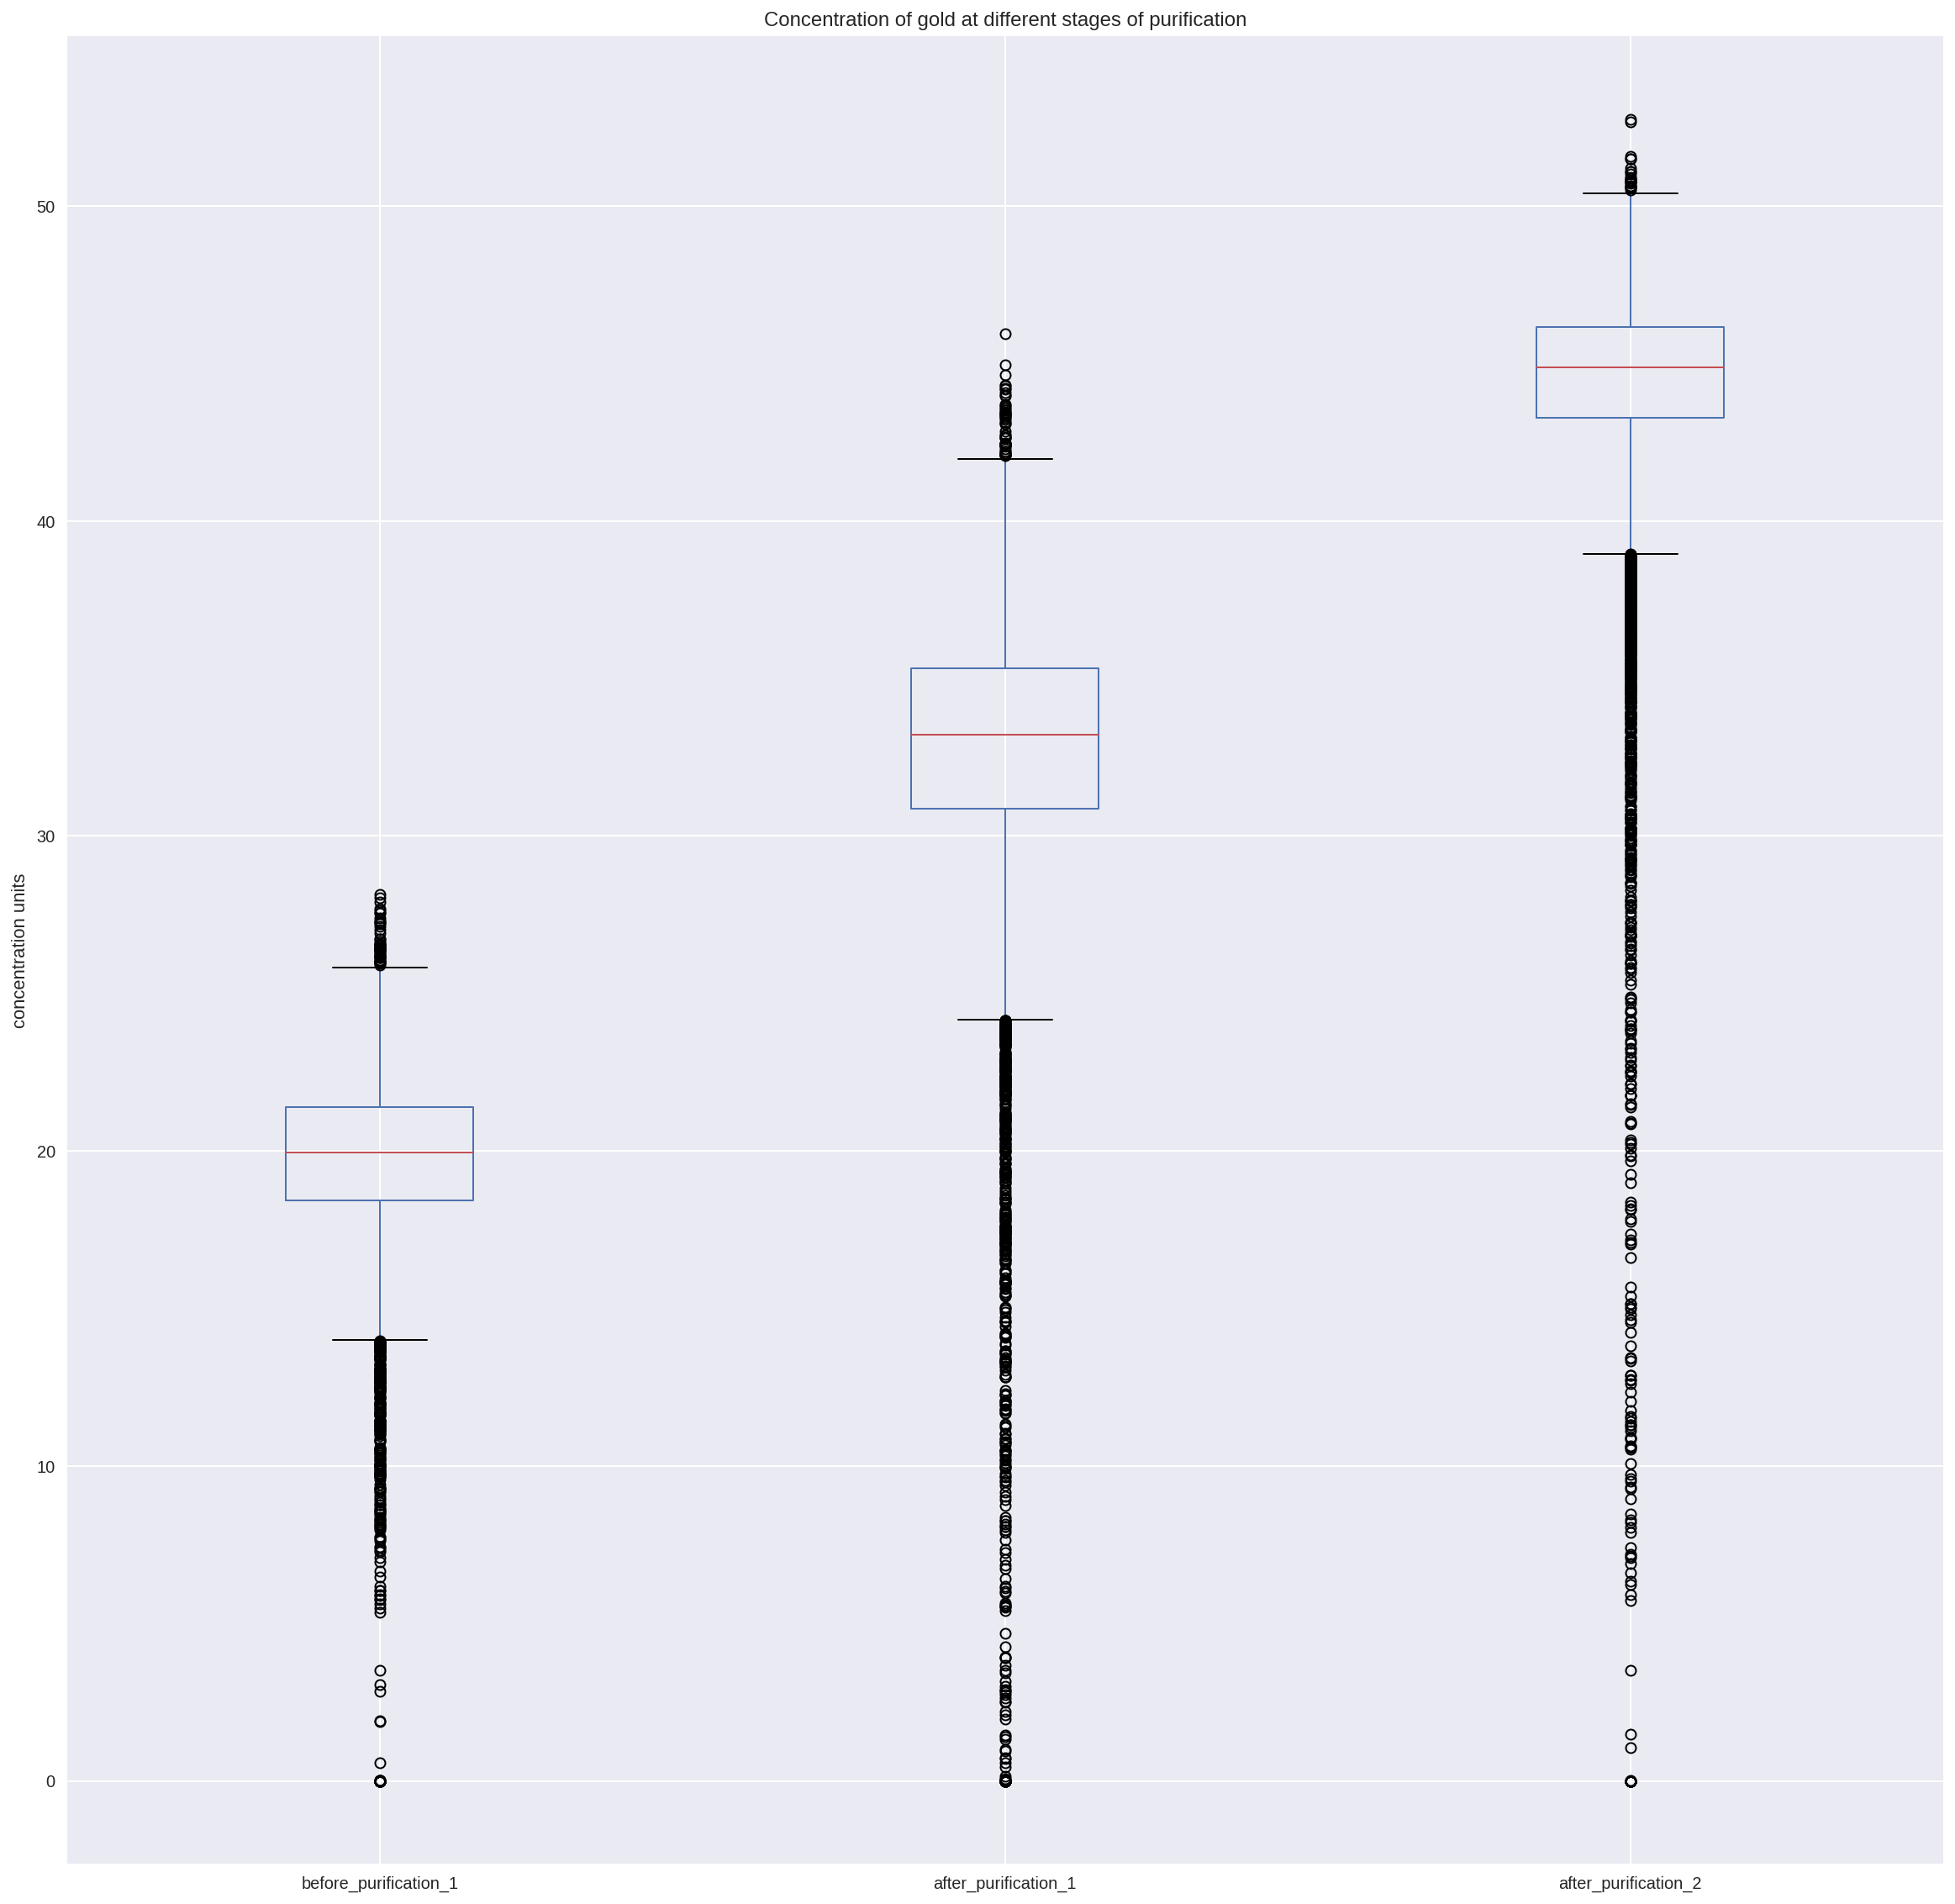

In [24]:
gold_conc=train_data[[
    'rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']]
gold_conc.columns=['before_purification_1', 'after_purification_1', 'after_purification_2']
print(gold_conc.describe())
gold_conc.plot(kind='box', figsize=(20,20))
plt.ylabel('concentration units')
plt.title('Concentration of gold at different stages of purification')
plt.show()


### Lead concentrations
The distribution for lead concentration before puritication 1 is labeled as before_purification_1; for lead cocentration after purication 1 is labeled as after_purification_1; and the lead concentration after purication 2 is labled as after_purification_2. We found that, on average, the lead concentration was higher after purication 2 with a mean value of 10.26 concentration units; after purication 1, we obtained a aveage of 9.6 concentration units; and before purication 1, we obtained an average of 7.85 concentration units. The distribution for concentration after purication 1 had the greatest value for standard deviation, with a value of 2.55; compared to after purication 2 and before purication 1 with values of 1.26 and 1.23 concentration units, respectively. The stage that the greatest maximum value was after purification 1 with a value of 15.83 concnetration units, however, this value was considered an outlier for the distribution of after purification 1.

       before_purification_1  after_purification_1  after_purification_2
count           14149.000000          14149.000000          14149.000000
mean                7.664555              9.568544             10.132848
std                 1.856279              2.709330              1.654925
min                 0.000000              0.000000              0.000000
25%                 6.850501              8.315997              9.296833
50%                 7.760435              9.920598             10.297013
75%                 8.601927             11.298487             11.170578
max                13.617072             17.081278             17.031899


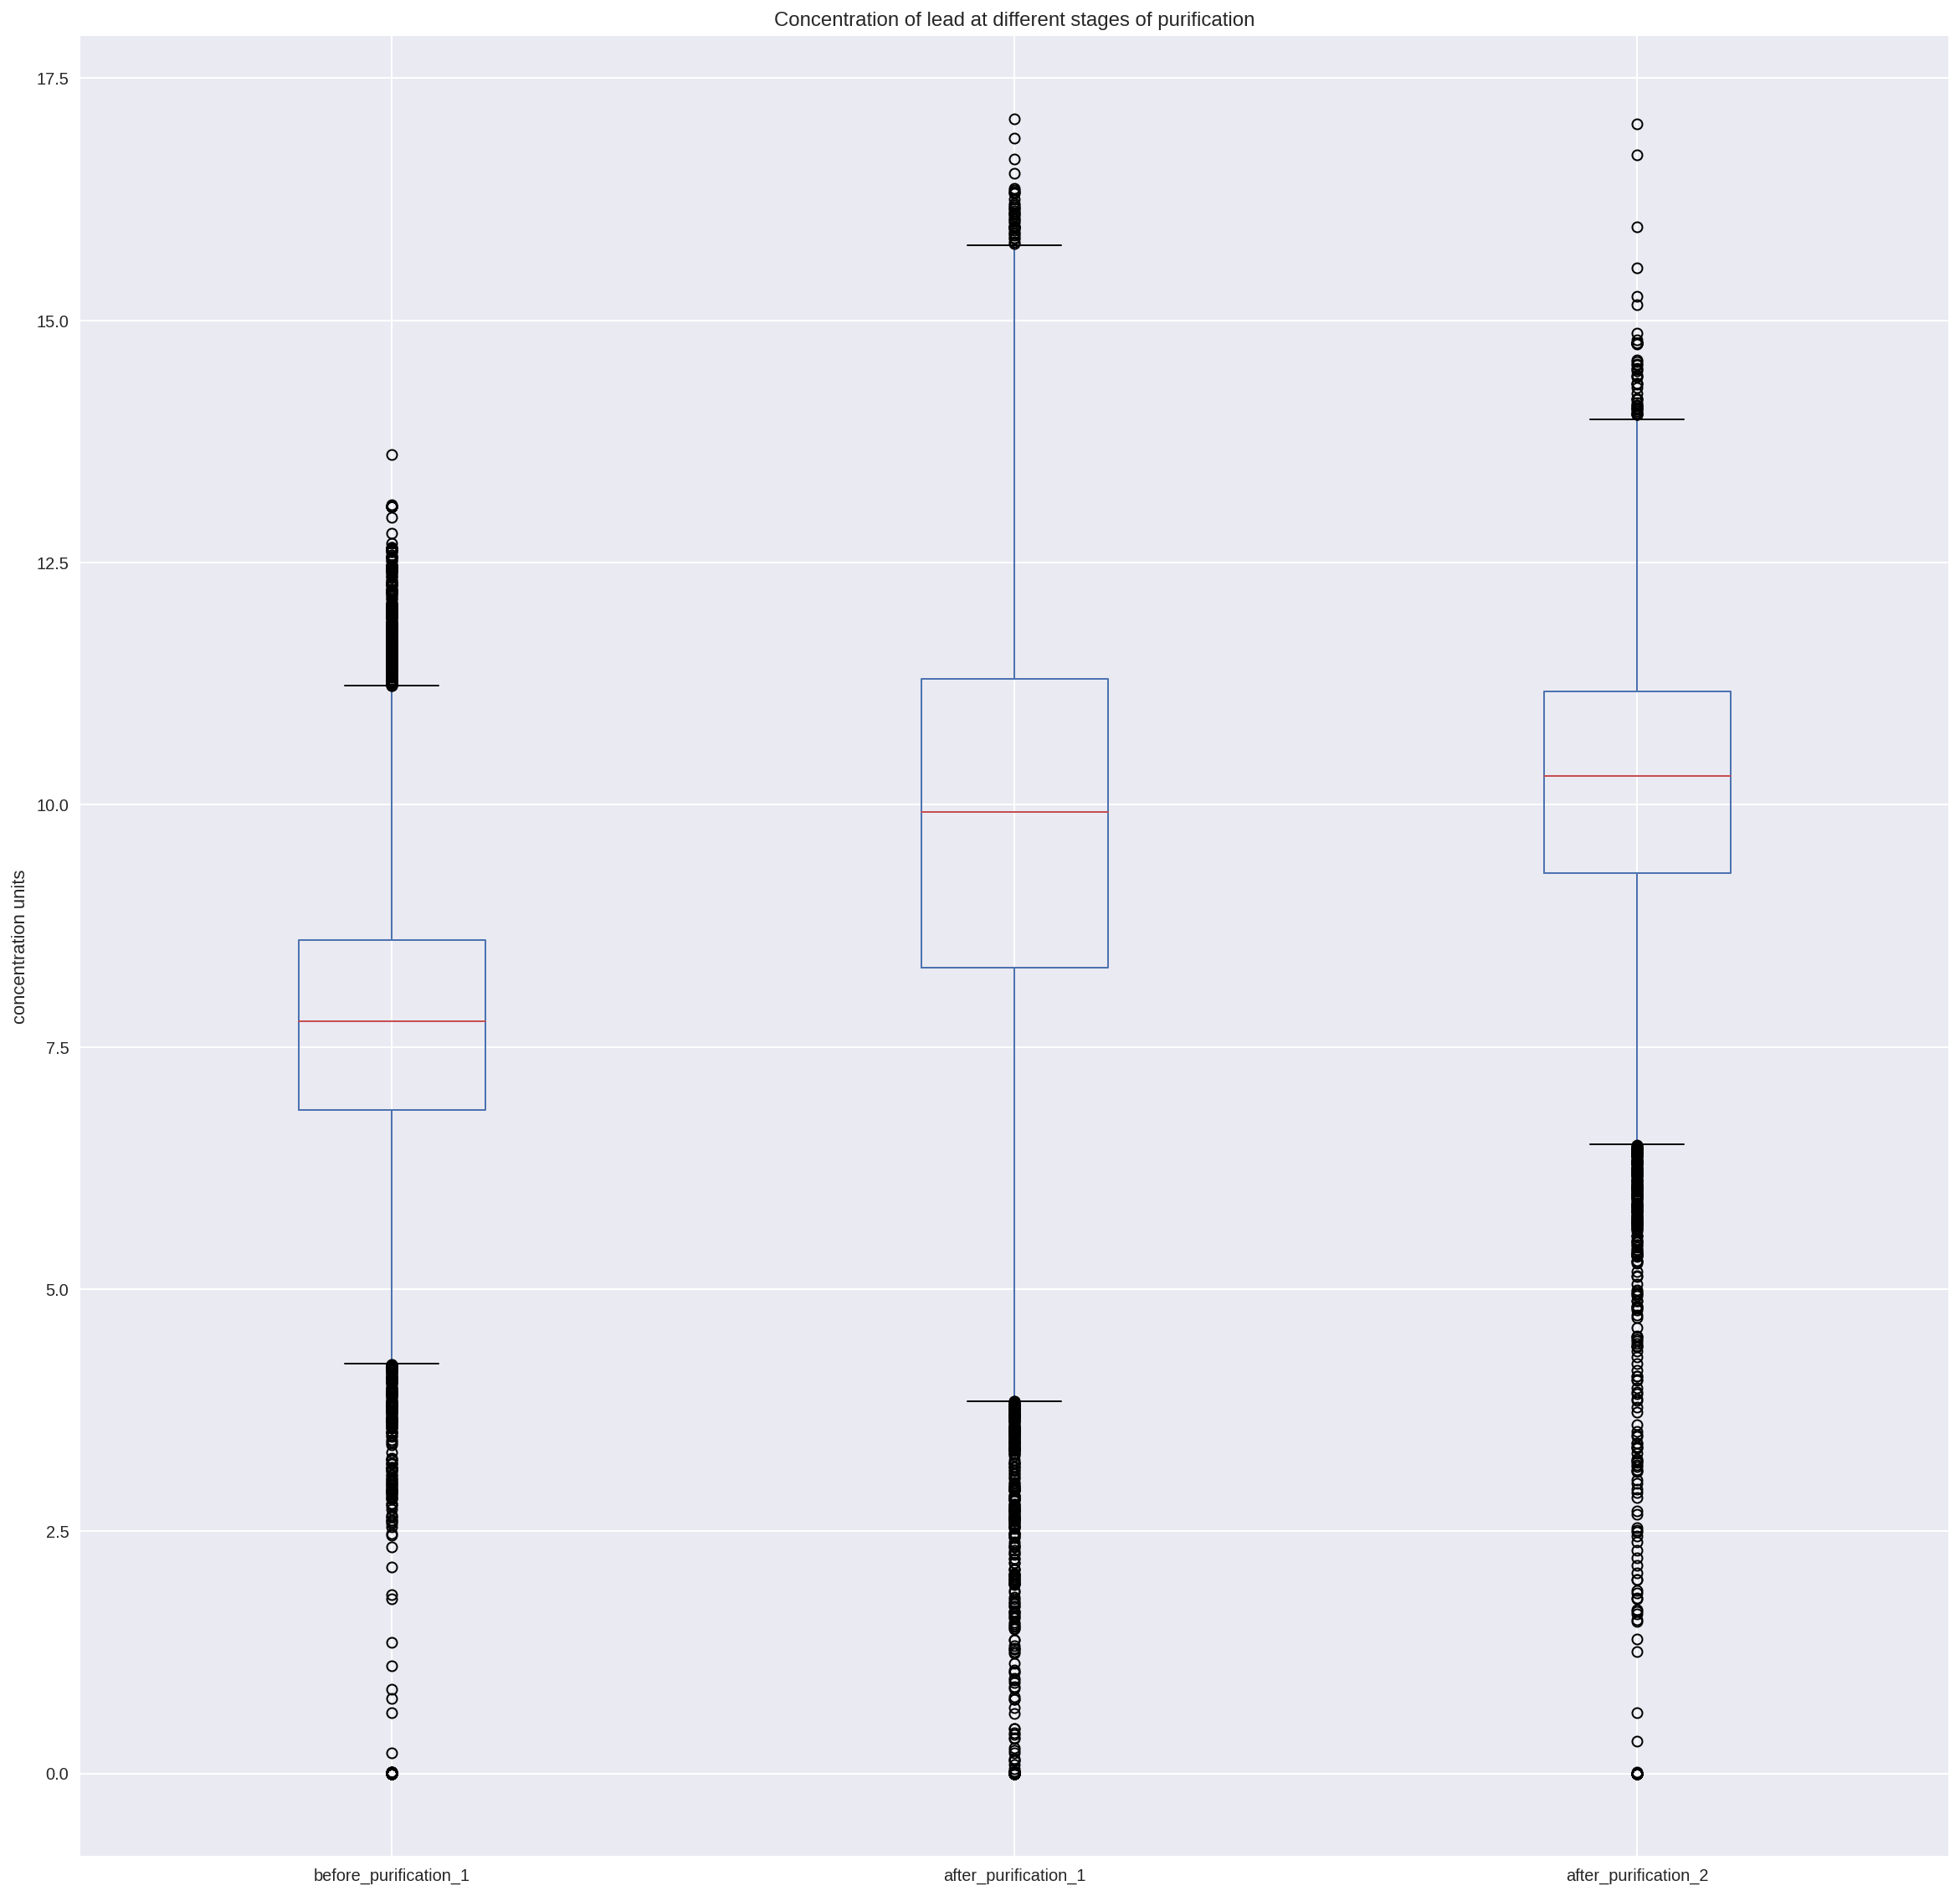

In [25]:
lead_conc=train_data[[
    'rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]
lead_conc.columns=['before_purification_1', 'after_purification_1', 'after_purification_2']
print(lead_conc.describe())
lead_conc.plot(kind='box', figsize=(20,20))
plt.ylabel('concentration units')
plt.title('Concentration of lead at different stages of purification')
plt.show()


### Silver concentrations

The distribution for silver concentration before puritication 1 is labeled as before_purification_1; for silver cocentration after purication 1 is labeled as after_purification_1; and the silver concentration after purication 2 is labled as after_purification_2. We found that, on average, the silver concentration was higher before purication 1 with a mean value of 12.09 concentration units; after purication 1, we obtained a aveage of 8.2 concentration units; and after purication 2, we obtained an average of 5.09 concentration units. The distribution for concentration after purication 1 had the greatest value for standard deviation, with a value of 1.89; compared to after purication 2 and before purication 1 with values of 1.05 and 1.87 concentration units, respectively. The stage that the greatest maximum value was before purification 1 with a value of 17.96 concnetration units, however, this value was considered an outlier for the distribution of after purification 1.

       before_purification_1  after_purification_1  after_purification_2
count           14149.000000          14149.000000          14149.000000
mean               11.775812              8.200916              5.141921
std                 2.731747              2.005185              1.369603
min                 0.000000              0.000000              0.000000
25%                10.486871              7.107126              4.211500
50%                11.747362              8.226247              4.994607
75%                13.426419              9.504924              5.859495
max                24.480271             16.081632             16.001945


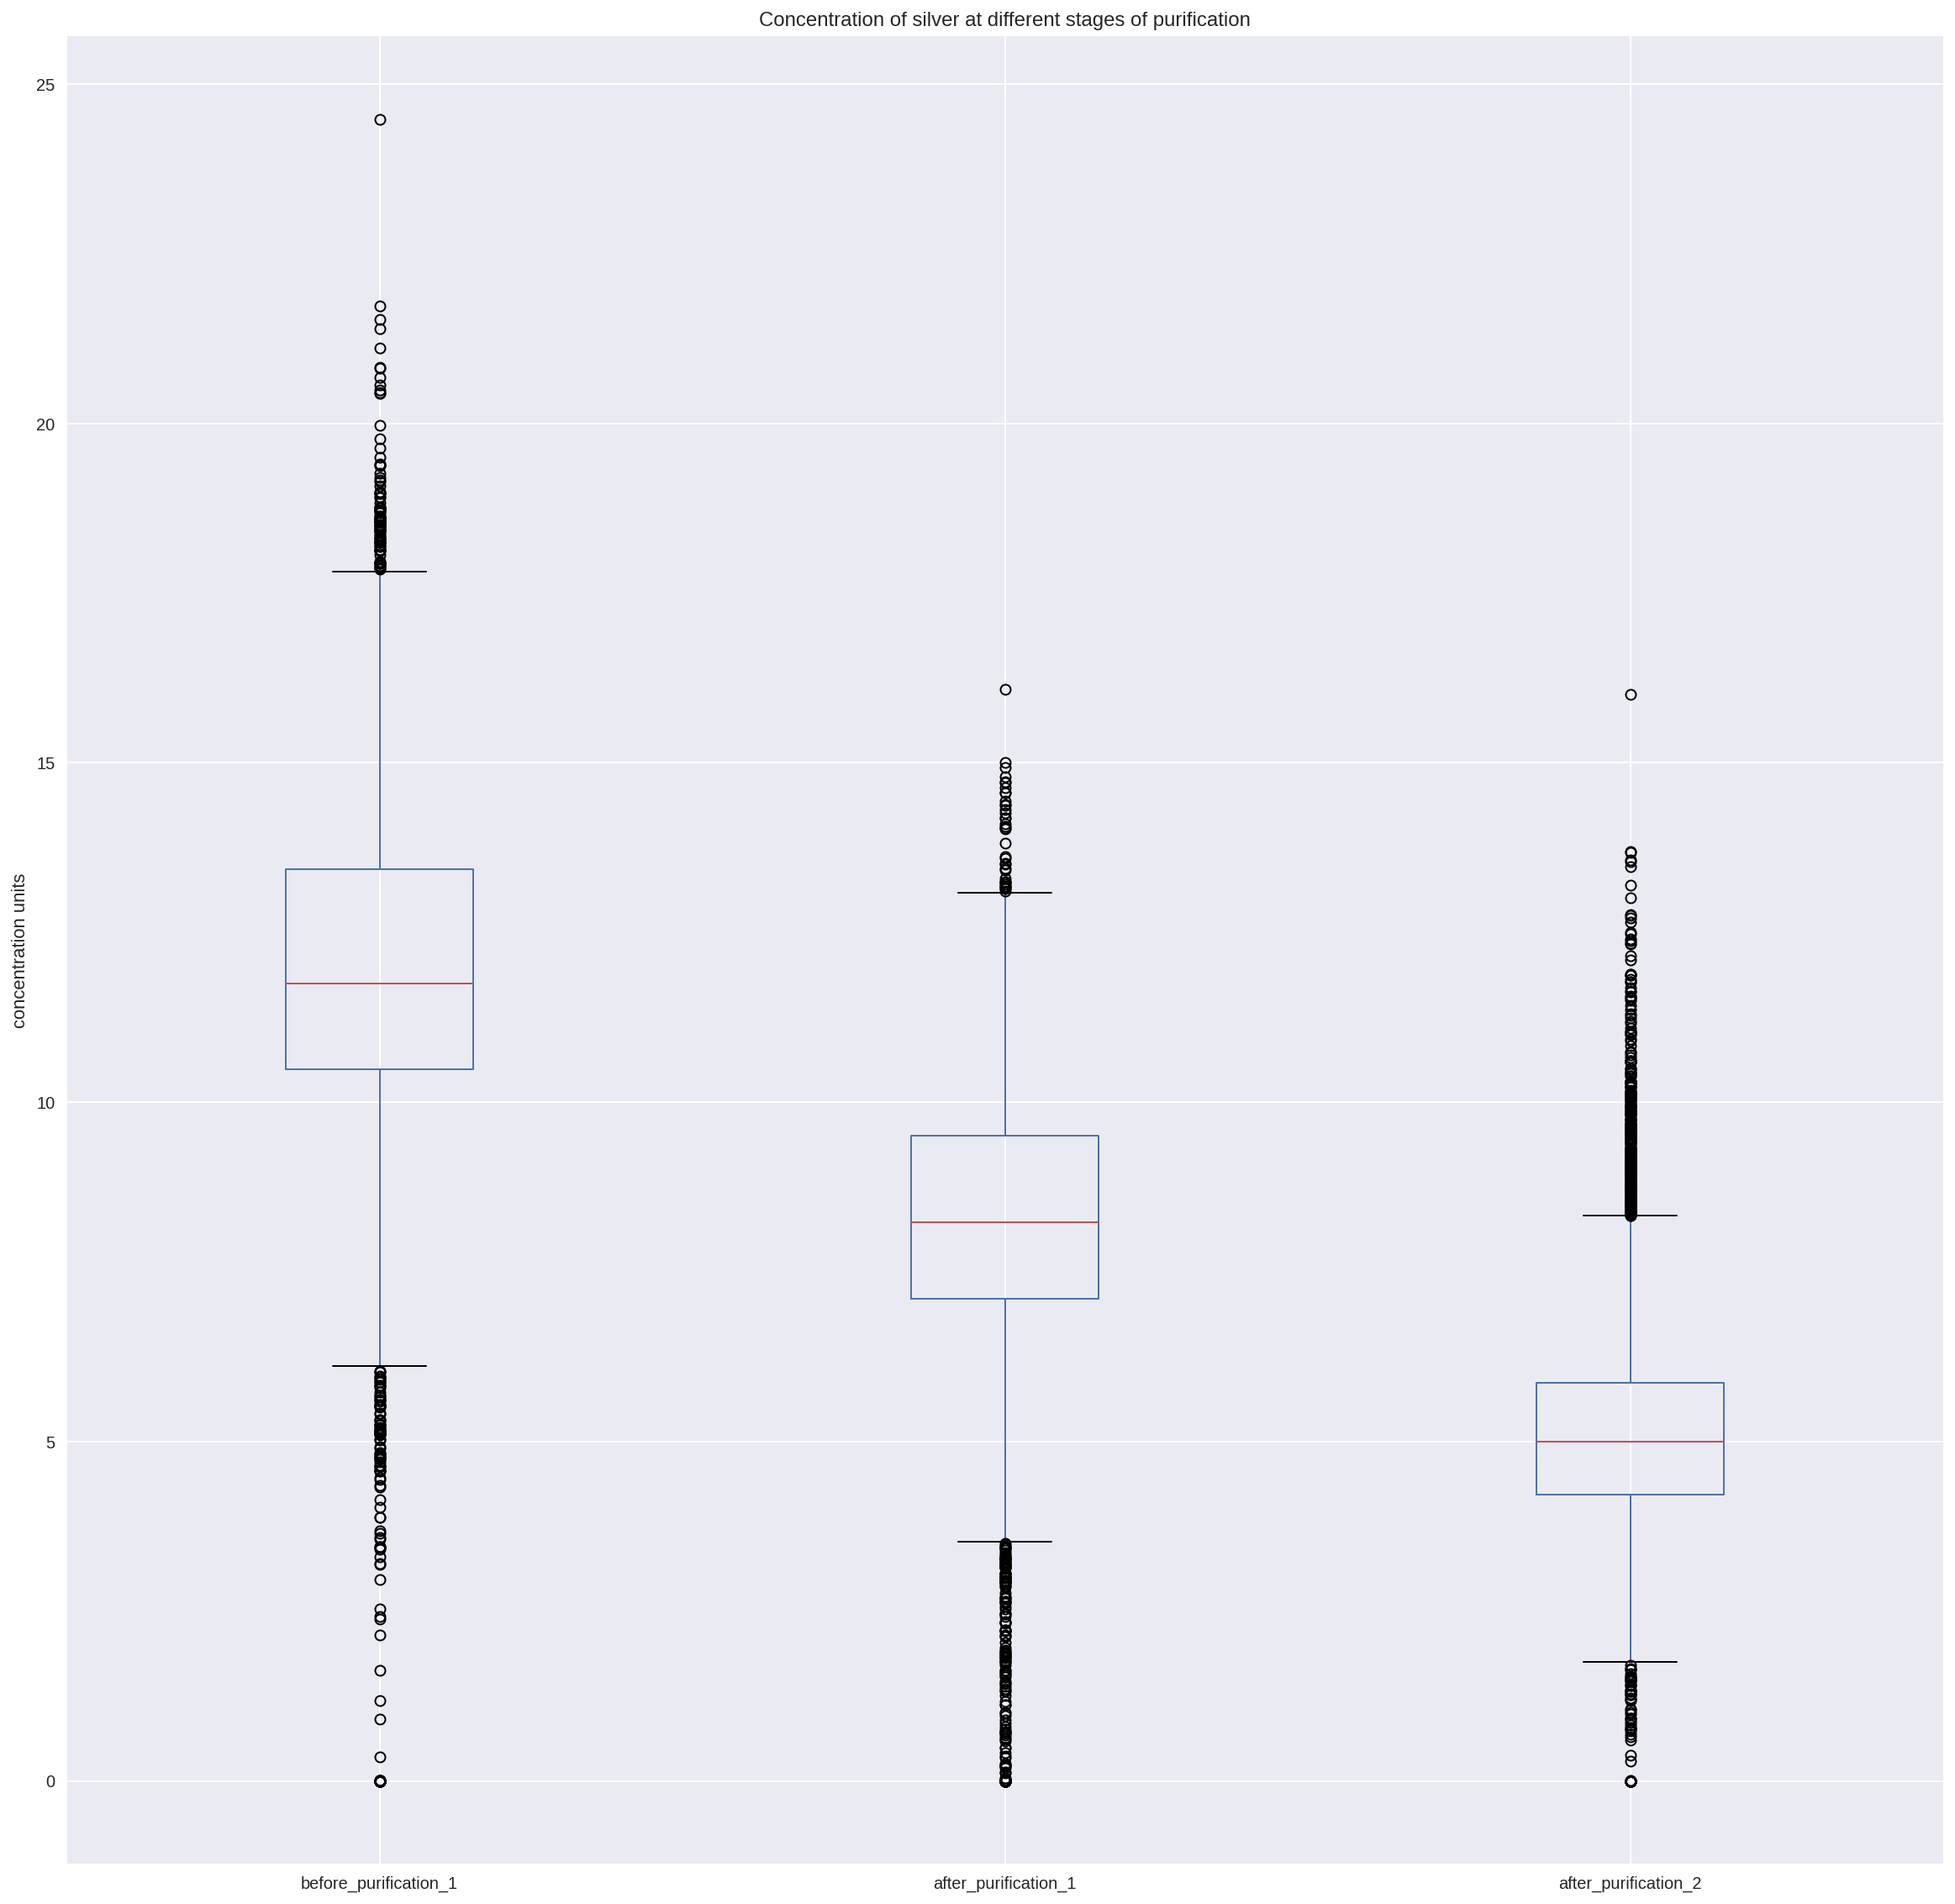

In [26]:
silver_conc=train_data[[
    'rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]
silver_conc.columns=['before_purification_1', 'after_purification_1', 'after_purification_2']
print(silver_conc.describe())
silver_conc.plot(kind='box', figsize=(20,20))
plt.ylabel('concentration units')
plt.title('Concentration of silver at different stages of purification')
plt.show()


### Comparing Feed Particle Size and Concentration Distributions

In this section, we compared the feed particle size, or rougher.input.feed_size, distributions in the training set and in the test set. The purpose of this section is to analyze that the distributions do not vary significantly. If the distributions vary significantly, the model evaluation will be incorrect. Based on the distributions, we conclue that the distributions do not vary significantly. The rougher feed size for train_data presented a mean of 60.18 and a standard deviation of 30.55; it had a postively skewed distributions. The rougher feed size for the test_data presented a mean value of 55.89 and a standard deviation of 22.70; the distribution also presented a postively skewed distribution.  The rougher feed particle size for test_data and train_data was illustrated by means of kernel density estimator, depicted below. As observed in the the KDE curve, the density distributions of rougher feed particle size did not vary significantly. 

#### Feed Distribution `rougher.input.feed_size`

In [27]:
train_feed_rougher=train_data['rougher.input.feed_size']
test_feed_rougher=test_data['rougher.input.feed_size']

print(train_feed_rougher.describe())
print()
print(test_feed_rougher.describe())

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64


[]

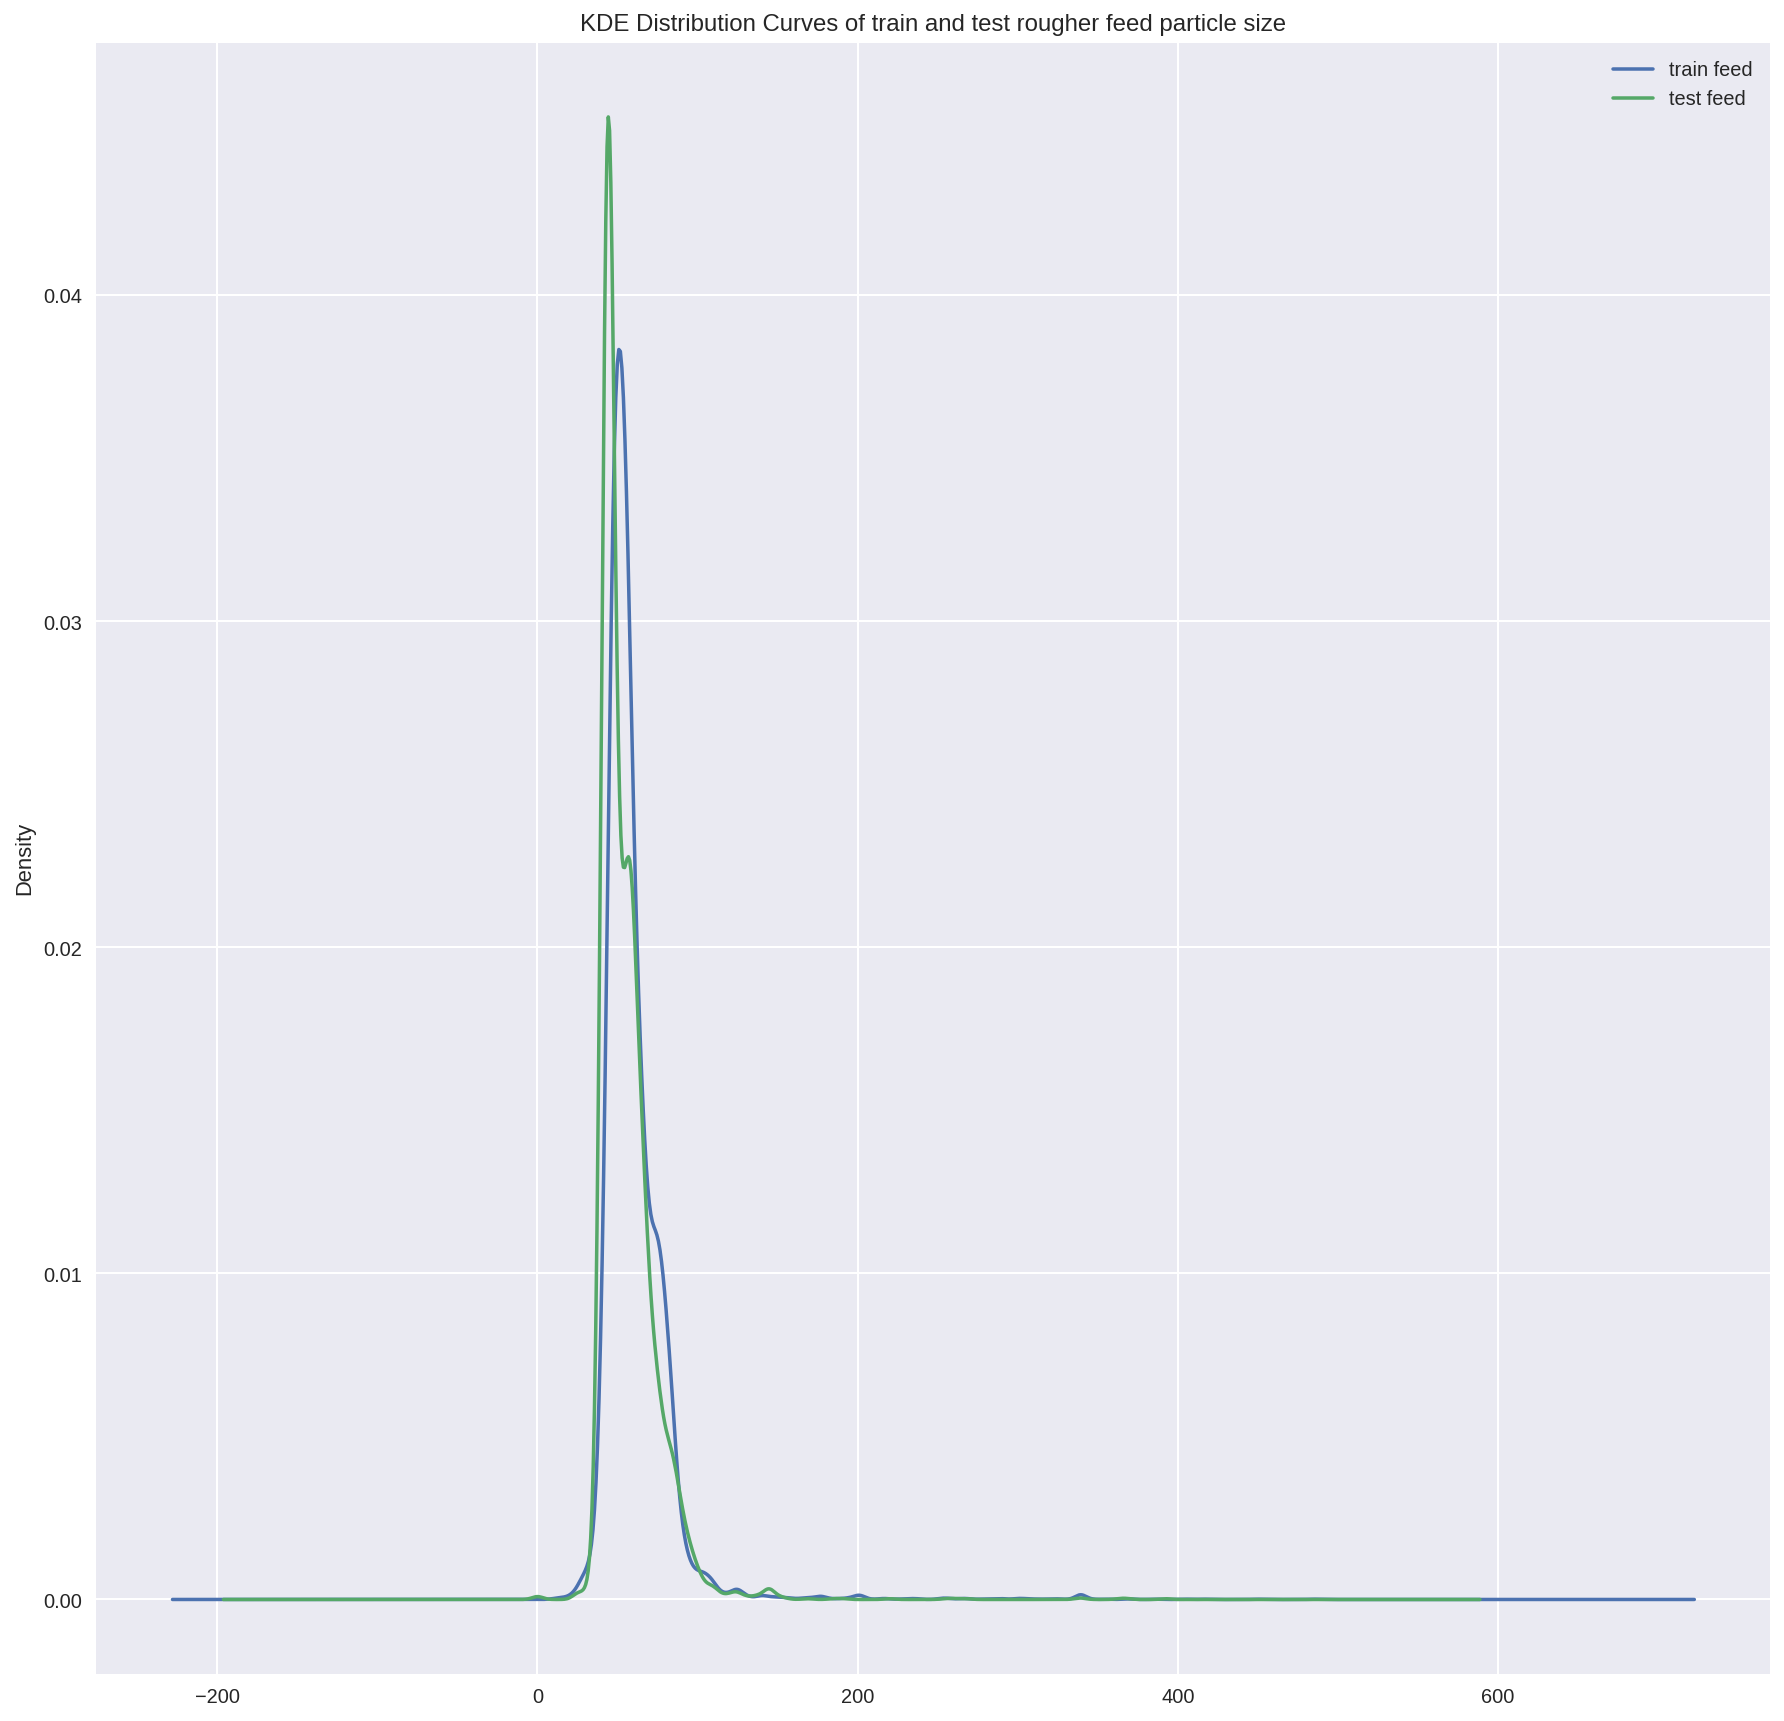

In [28]:
plt.figure(figsize=(15,15))
train_feed_rougher.plot.kde(label='train feed')
test_feed_rougher.plot.kde(label='test feed')
plt.legend(loc='best')
plt.title('KDE Distribution Curves of train and test rougher feed particle size')
plt.plot()

#### Feed Distribution `primary_cleaner.input.feed_size`

In this section, we compared the feed particle size, or primary_cleaner.input.feed_size, distributions in the training set and in the test set. The purpose of this section is to analyze that the distributions do not vary significantly. If the distributions vary significantly, the model evaluation will be incorrect. Based on the distributions, we conclue that the distributions do not vary significantly. The priary cleaner feed size for train_data presented a mean of 7.29 and a standard deviation of 0.62; it had a postively skewed distributions. The primary cleaner feed size for the test_data presented a mean value of 7.26 and a standard deviation of 0.61; the distribution also presented a postively skewed distribution. The feed particle size for test_data and train_data was illustrated by means of kernel density estimator, depicted below. As observed in the the KDE curve, the density distributions of primary feed particle size did not vary significantly. 

In [29]:
train_feed_primary=train_data['primary_cleaner.input.feed_size']
test_feed_primary=test_data['primary_cleaner.input.feed_size']



In [30]:
print(train_feed_primary.describe())
print()
print(test_feed_primary.describe())

count    14149.000000
mean         7.322310
std          0.614062
min          1.080000
25%          6.960000
50%          7.290000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

count    5290.000000
mean        7.266339
std         0.610219
min         5.650000
25%         6.890000
50%         7.250000
75%         7.600000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64


[]

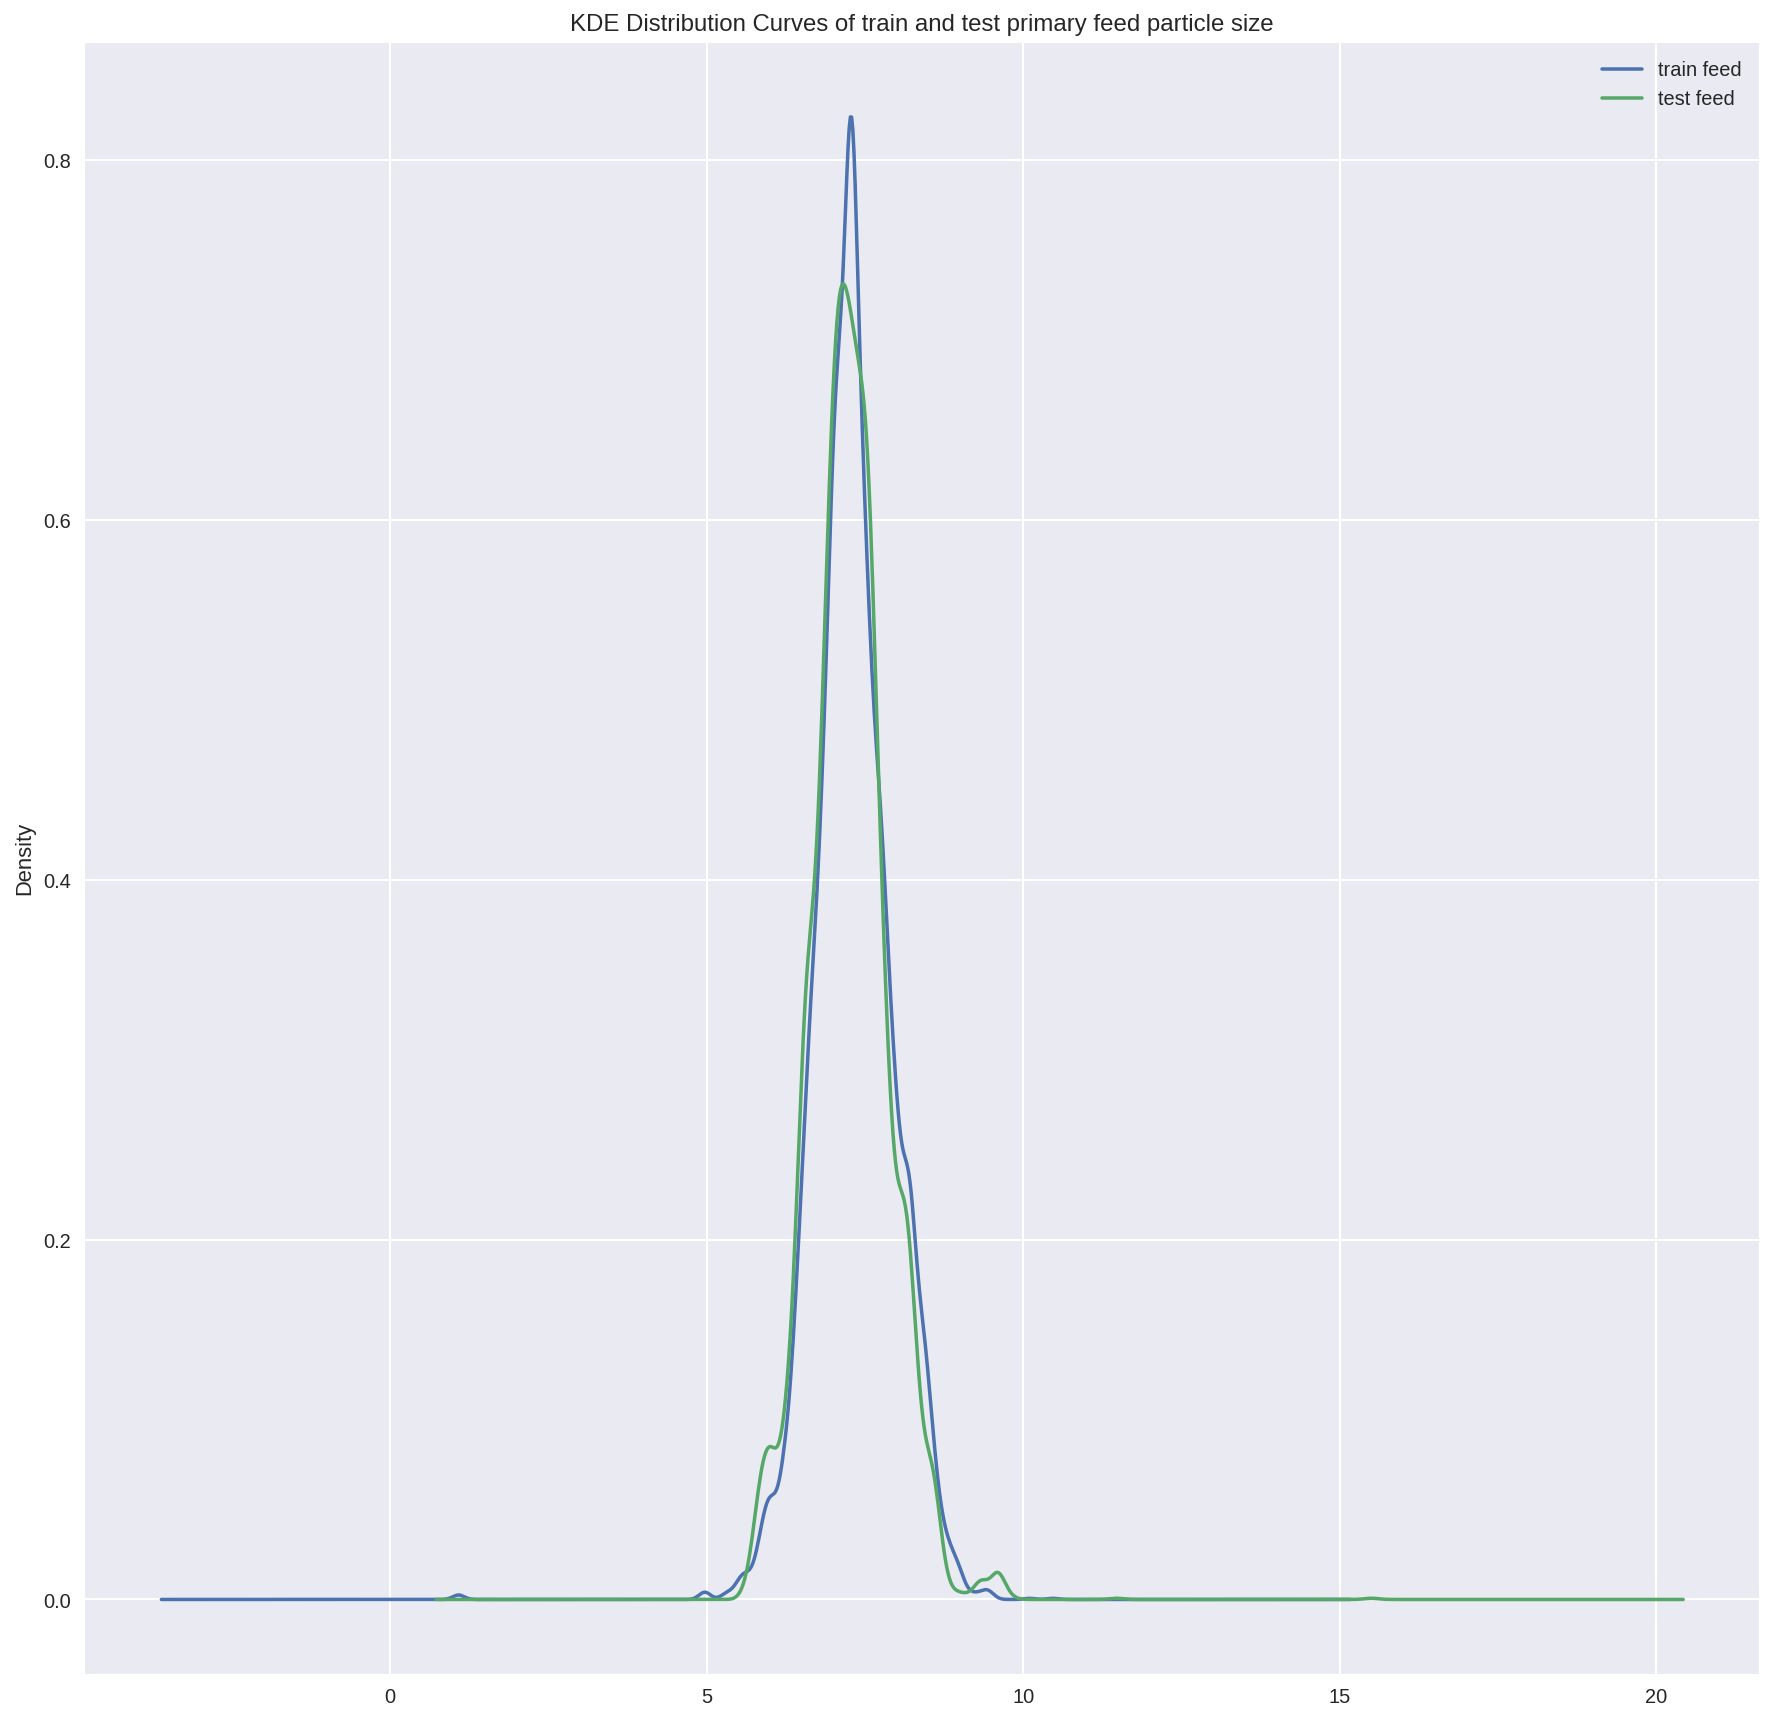

In [31]:
plt.figure(figsize=(15,15))
train_feed_primary.plot.kde(label='train feed')
test_feed_primary.plot.kde(label='test feed')
plt.legend(loc='best')
plt.title('KDE Distribution Curves of train and test primary feed particle size')
plt.plot()

####  Comapring Total Concentrations of Substances at Different Stages

In this section, we considered the total concentrations of all metals at different stages: raw feed, rougher concentrate, and final concentrate. We analyzed the distributions to find abnormal values in the total distribution. We used the source_data to observe if there were any abnormal values in the distribution at each stage.

##### Raw Feed Total Concentrations
The distribution of the raw feed concentrations, for the metals in the source_data is summarized below. From the description, the distribution presented a mean of 20.64 concentration units; a median value of 20.14 concentration units; and a standard deviation of 4.48 concentration units. The distribution appeared as positively skewed based on the comparison between mean and median values from distribution. 

In [32]:
raw_feed_total_con=source_data['rougher.input.feed_ag'] + source_data['rougher.input.feed_au'] + source_data['rougher.input.feed_pb']
raw_feed_total_con.describe()

count    19439.000000
mean        20.646120
std          4.480027
min          0.030000
25%         17.252879
50%         20.141216
75%         23.797381
max         33.498784
dtype: float64

[]

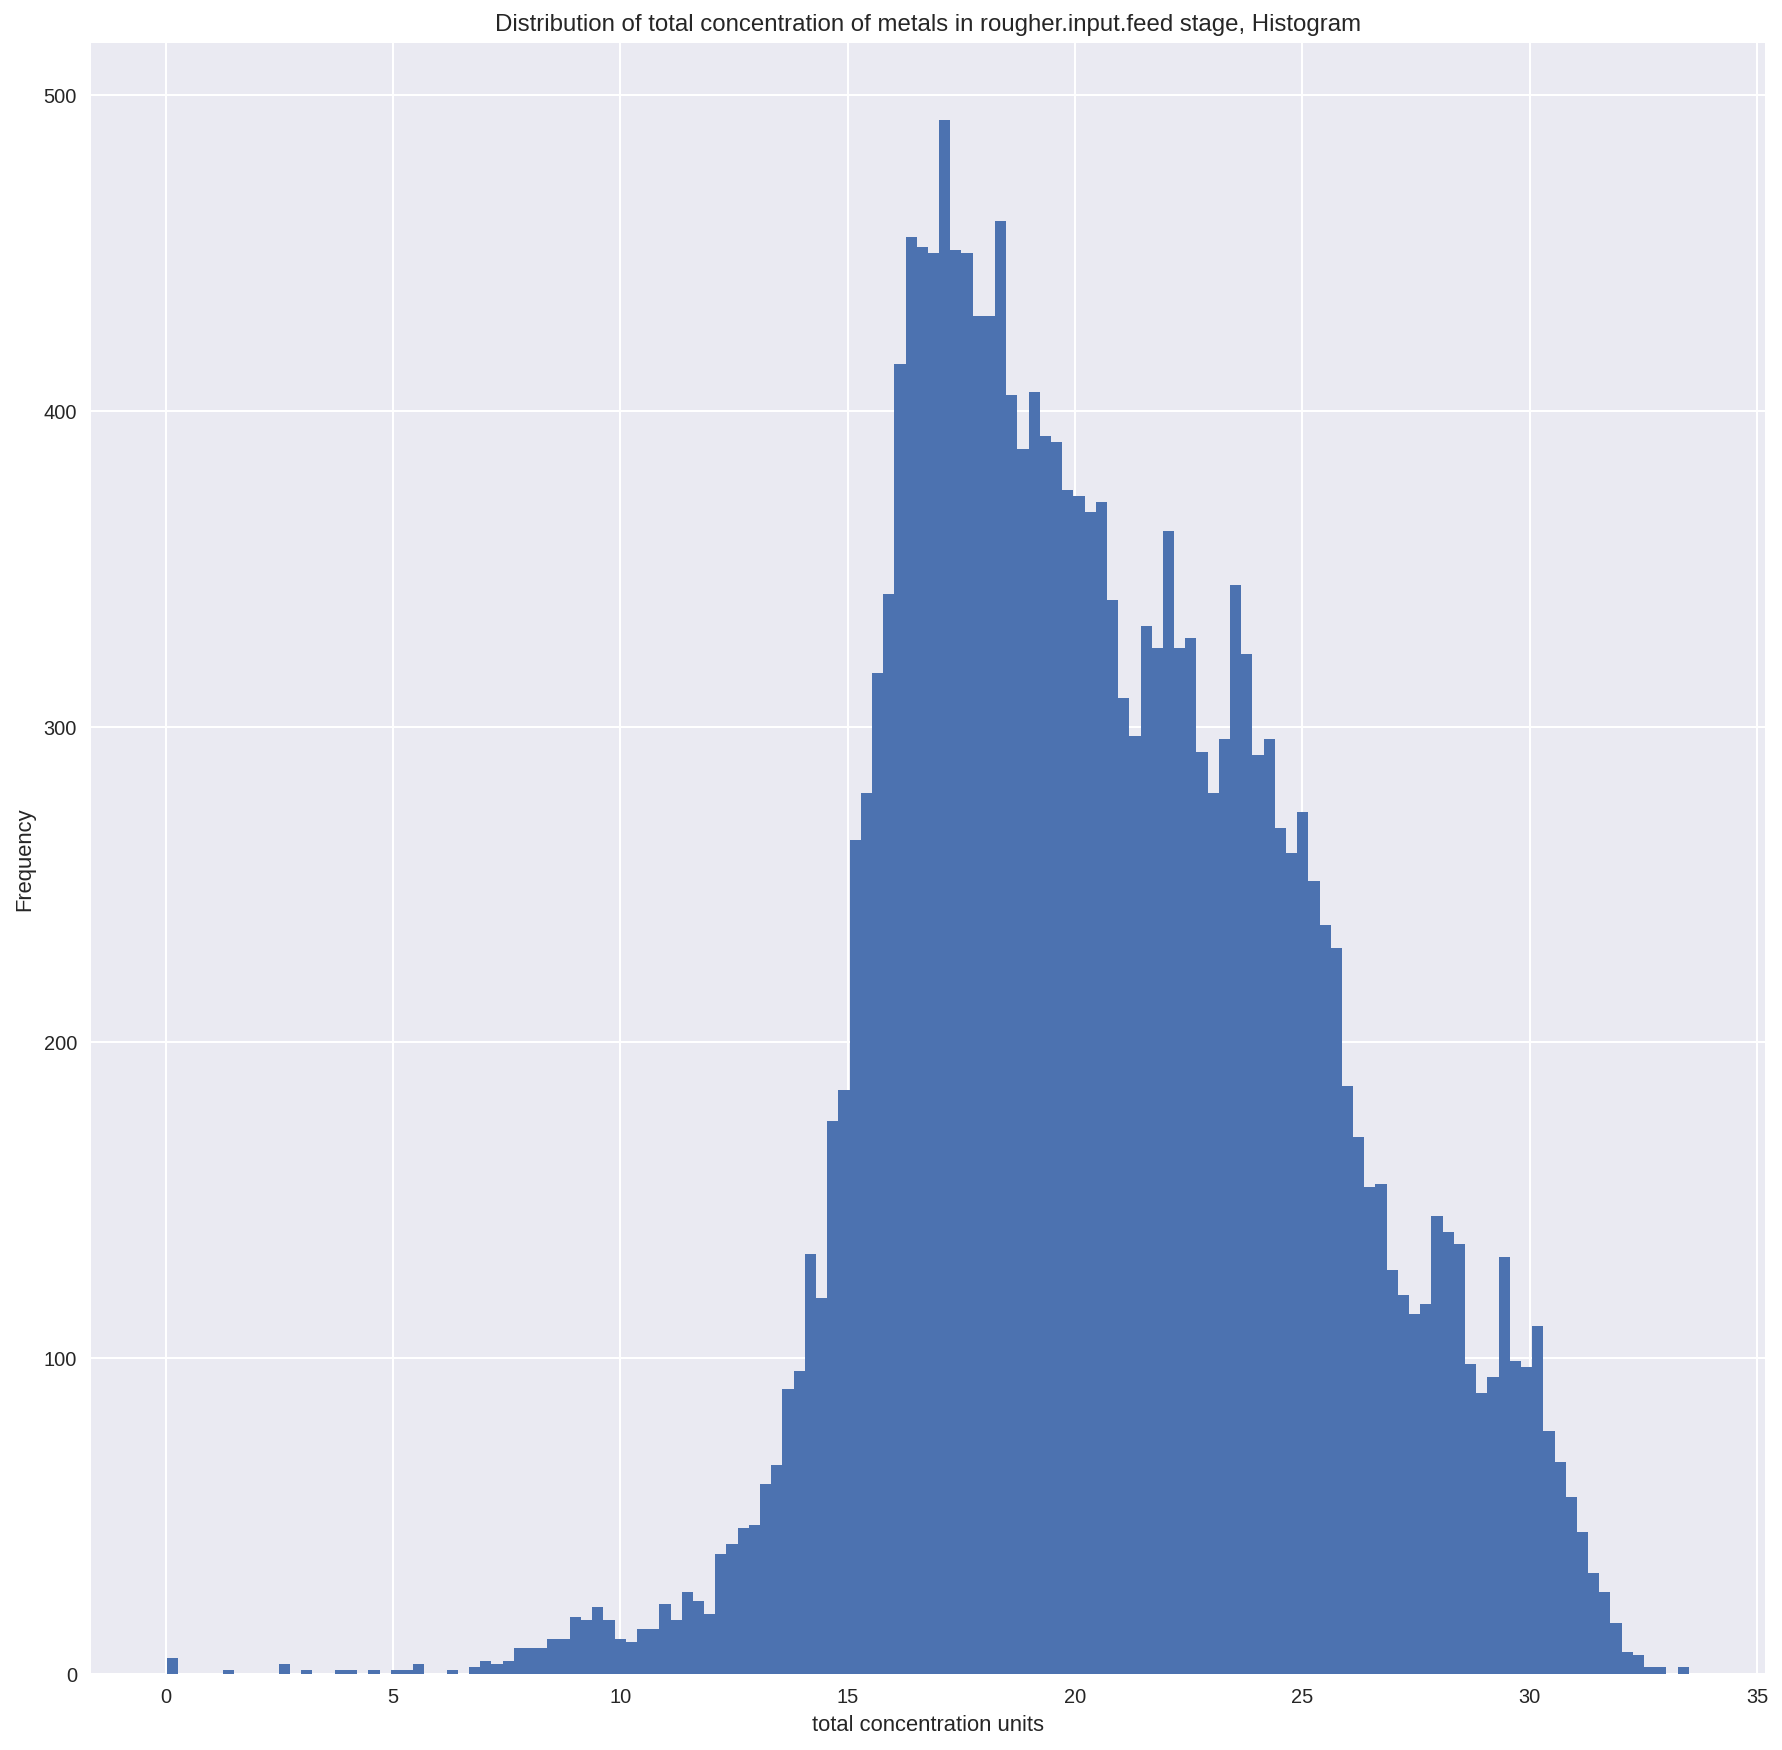

In [33]:
raw_feed_total_con.plot(kind='hist', figsize=(15,15), bins=136)
plt.xlabel('total concentration units')
plt.title('Distribution of total concentration of metals in rougher.input.feed stage, Histogram')
plt.plot()

Based on the distribution of total concentration of metal in the input.feed stage, we found a total of 29 outliers that were smaller than 1.5*iqr. We decided to remove the rows of these values from the source_data. 

In [34]:
#checking for outliers in the raw feed total concentration distribution
q1_raw=raw_feed_total_con.quantile(0.25)
q3_raw=raw_feed_total_con.quantile(0.75)
iqr_raw=q3_raw - q1_raw 

raw_outliers_upper=raw_feed_total_con[raw_feed_total_con > (q3_raw + 1.5*iqr_raw)]
print('raw_outliers_upper',raw_outliers_upper)
print()
raw_outliers_lower=raw_feed_total_con[raw_feed_total_con < (q1_raw - 1.5*iqr_raw)]
print('raw_outliers_lower',raw_outliers_lower)
print('raw_outliers_lower length',len(raw_outliers_lower))


raw_outliers_upper Series([], dtype: float64)

raw_outliers_lower 1404     2.596715
2328     2.560855
4656     5.195162
5551     1.410750
7236     6.399459
7652     7.246622
9935     5.611242
11182    6.991427
13569    7.003885
13842    2.682233
14158    7.336996
15840    6.678988
16830    5.503477
17585    5.503679
18890    3.760607
18891    0.030000
18892    0.030000
18893    0.030000
18894    0.030000
18895    0.030000
18977    3.105904
19005    4.618286
19500    5.394392
20154    7.155093
20281    7.137762
20282    6.792343
20283    7.324626
20429    4.090721
21515    7.421942
dtype: float64
raw_outliers_lower length 29


In [35]:
outliers_raw_index=raw_outliers_lower.index
source_data.drop(outliers_raw_index, inplace=True)
source_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19410 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19410 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19410 non-null  float64       
 2   final.output.concentrate_pb                         19410 non-null  float64       
 3   final.output.concentrate_sol                        19410 non-null  float64       
 4   final.output.concentrate_au                         19410 non-null  float64       
 5   final.output.recovery                               19410 non-null  float64       
 6   final.output.tail_ag                                19410 non-null  float64       
 7   final.output.tail_pb                                19410 non-null  float64       
 8   final.

[]

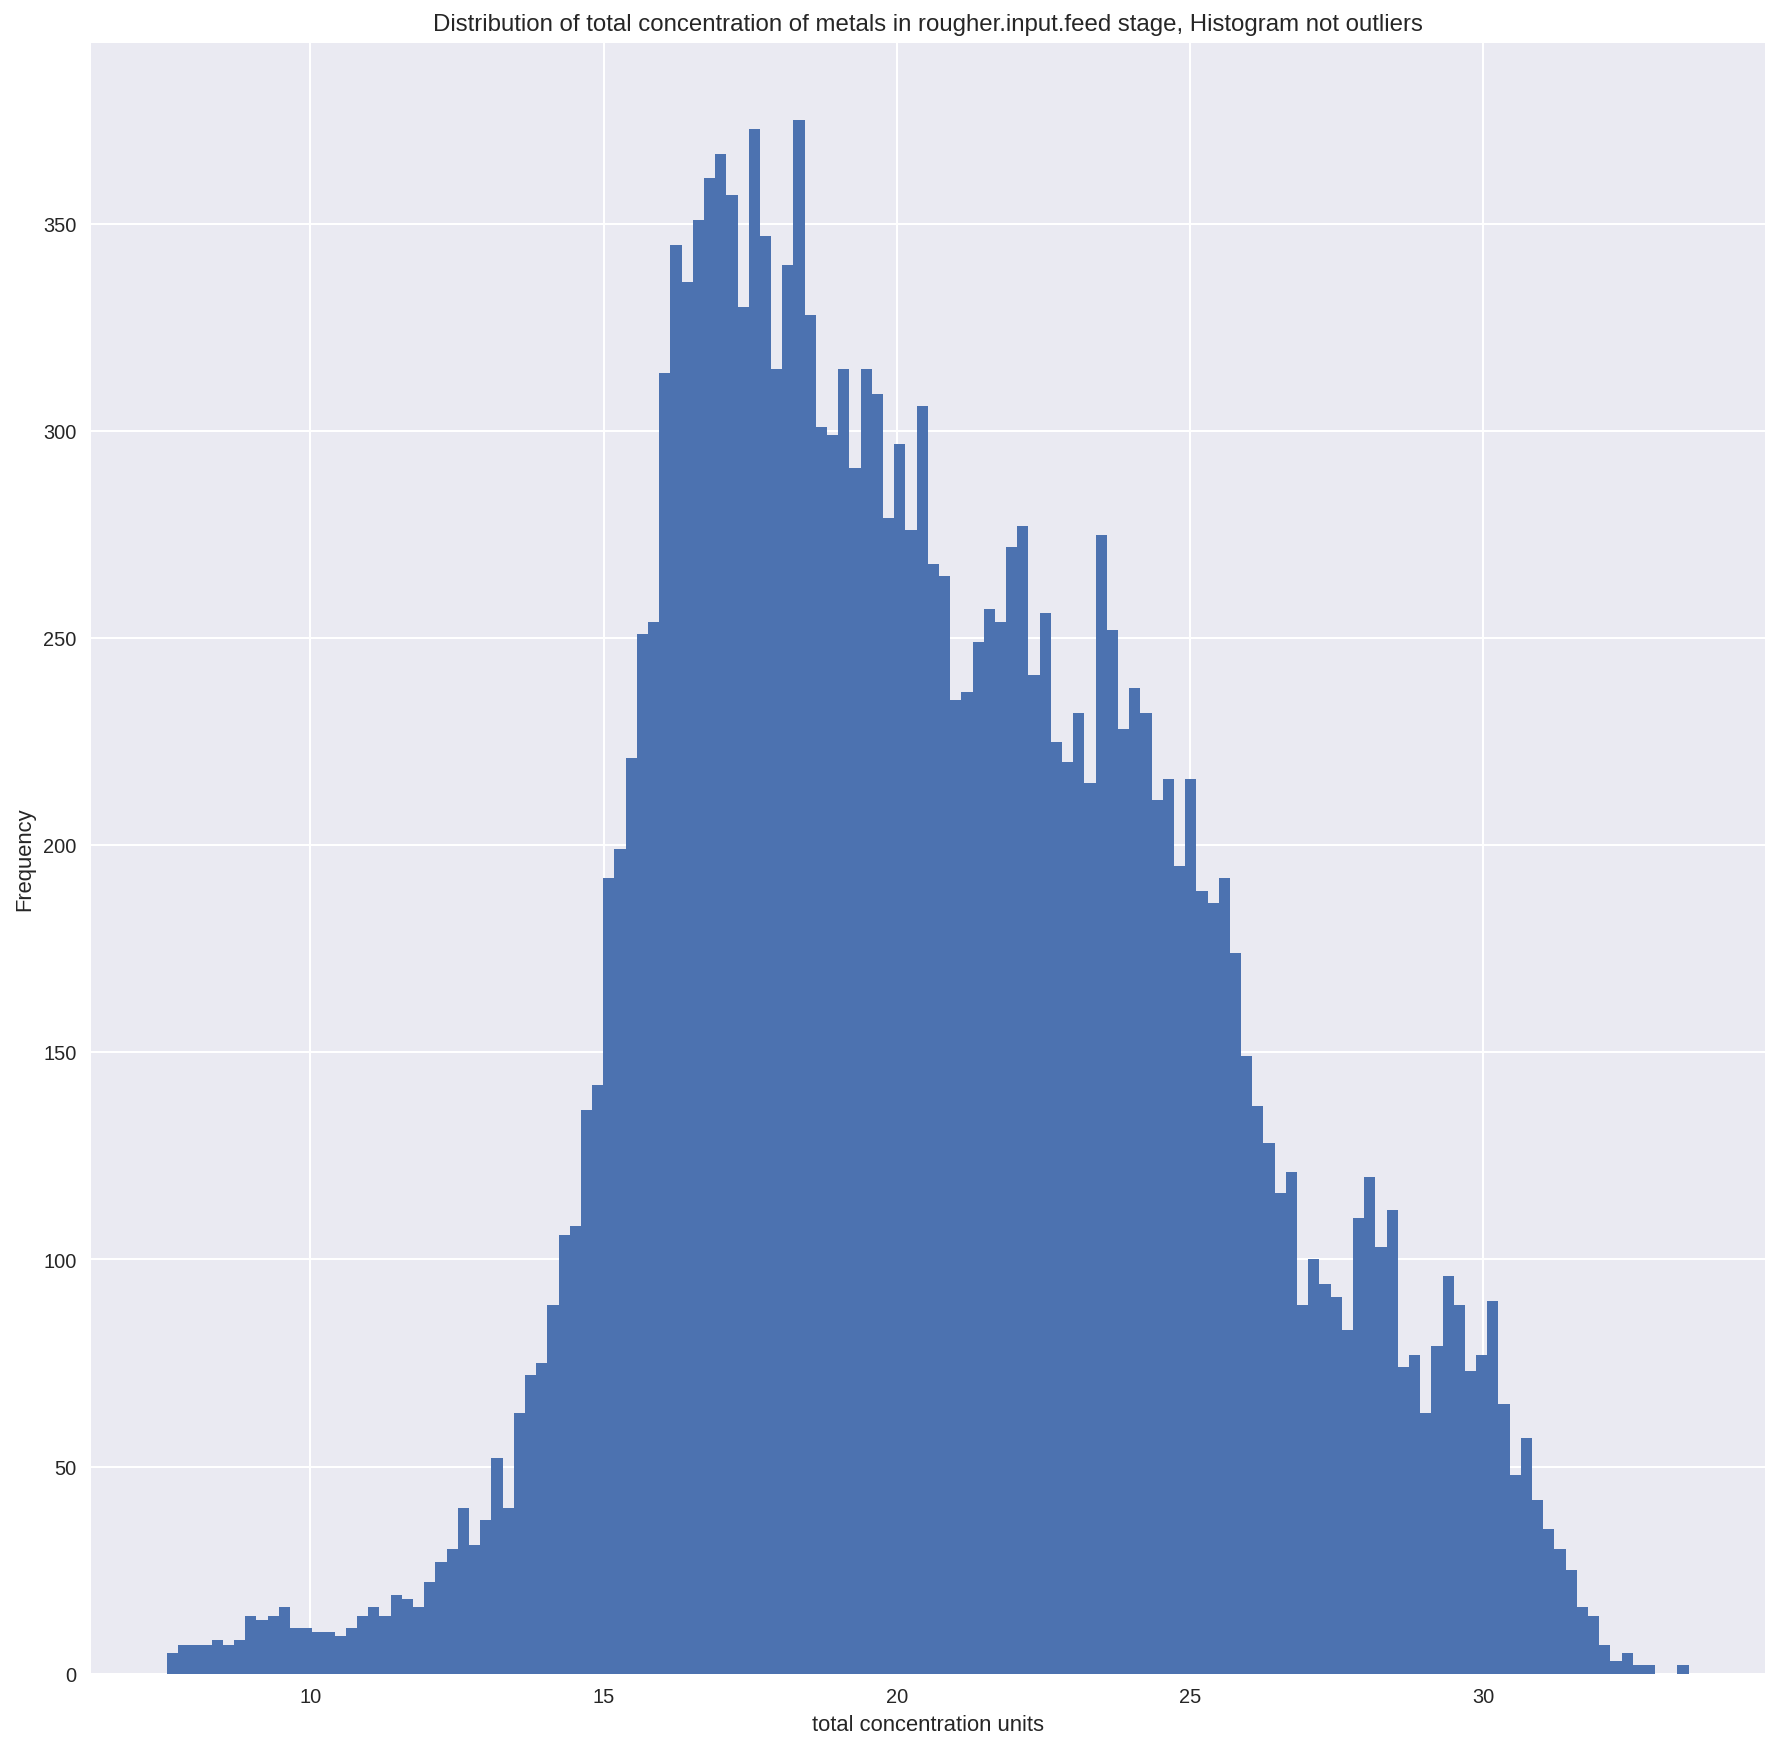

In [36]:
#distribution of raw feed total concentration after removing outliers 
raw_feed_total_con=source_data['rougher.input.feed_ag'] + source_data['rougher.input.feed_au'] + source_data['rougher.input.feed_pb']
raw_feed_total_con.plot(kind='hist', figsize=(15,15), bins=136)
plt.xlabel('total concentration units')
plt.title('Distribution of total concentration of metals in rougher.input.feed stage, Histogram not outliers')
plt.plot()

##### Rougher Concentrate Total  Concentrations
The distribution of the rougher concentrate total concentrations, for the metals in the souce_data is summarized below. From the description, the distribution presented a mean of 39.41 concentration units; a median value of 40.31 concentration units; and a standard deviation of 6.77 concentration units. The distribution appeared as negatively skewed based on the comparison between mean and median values from distribution. 

In [37]:
rougher_conc_total_con=source_data['rougher.output.concentrate_ag'] + source_data['rougher.output.concentrate_au'] + source_data['rougher.output.concentrate_pb']
rougher_conc_total_con.describe()

count    19410.000000
mean        39.411337
std          6.774314
min          0.000000
25%         38.401748
50%         40.316266
75%         42.369294
max         55.568687
dtype: float64

[]

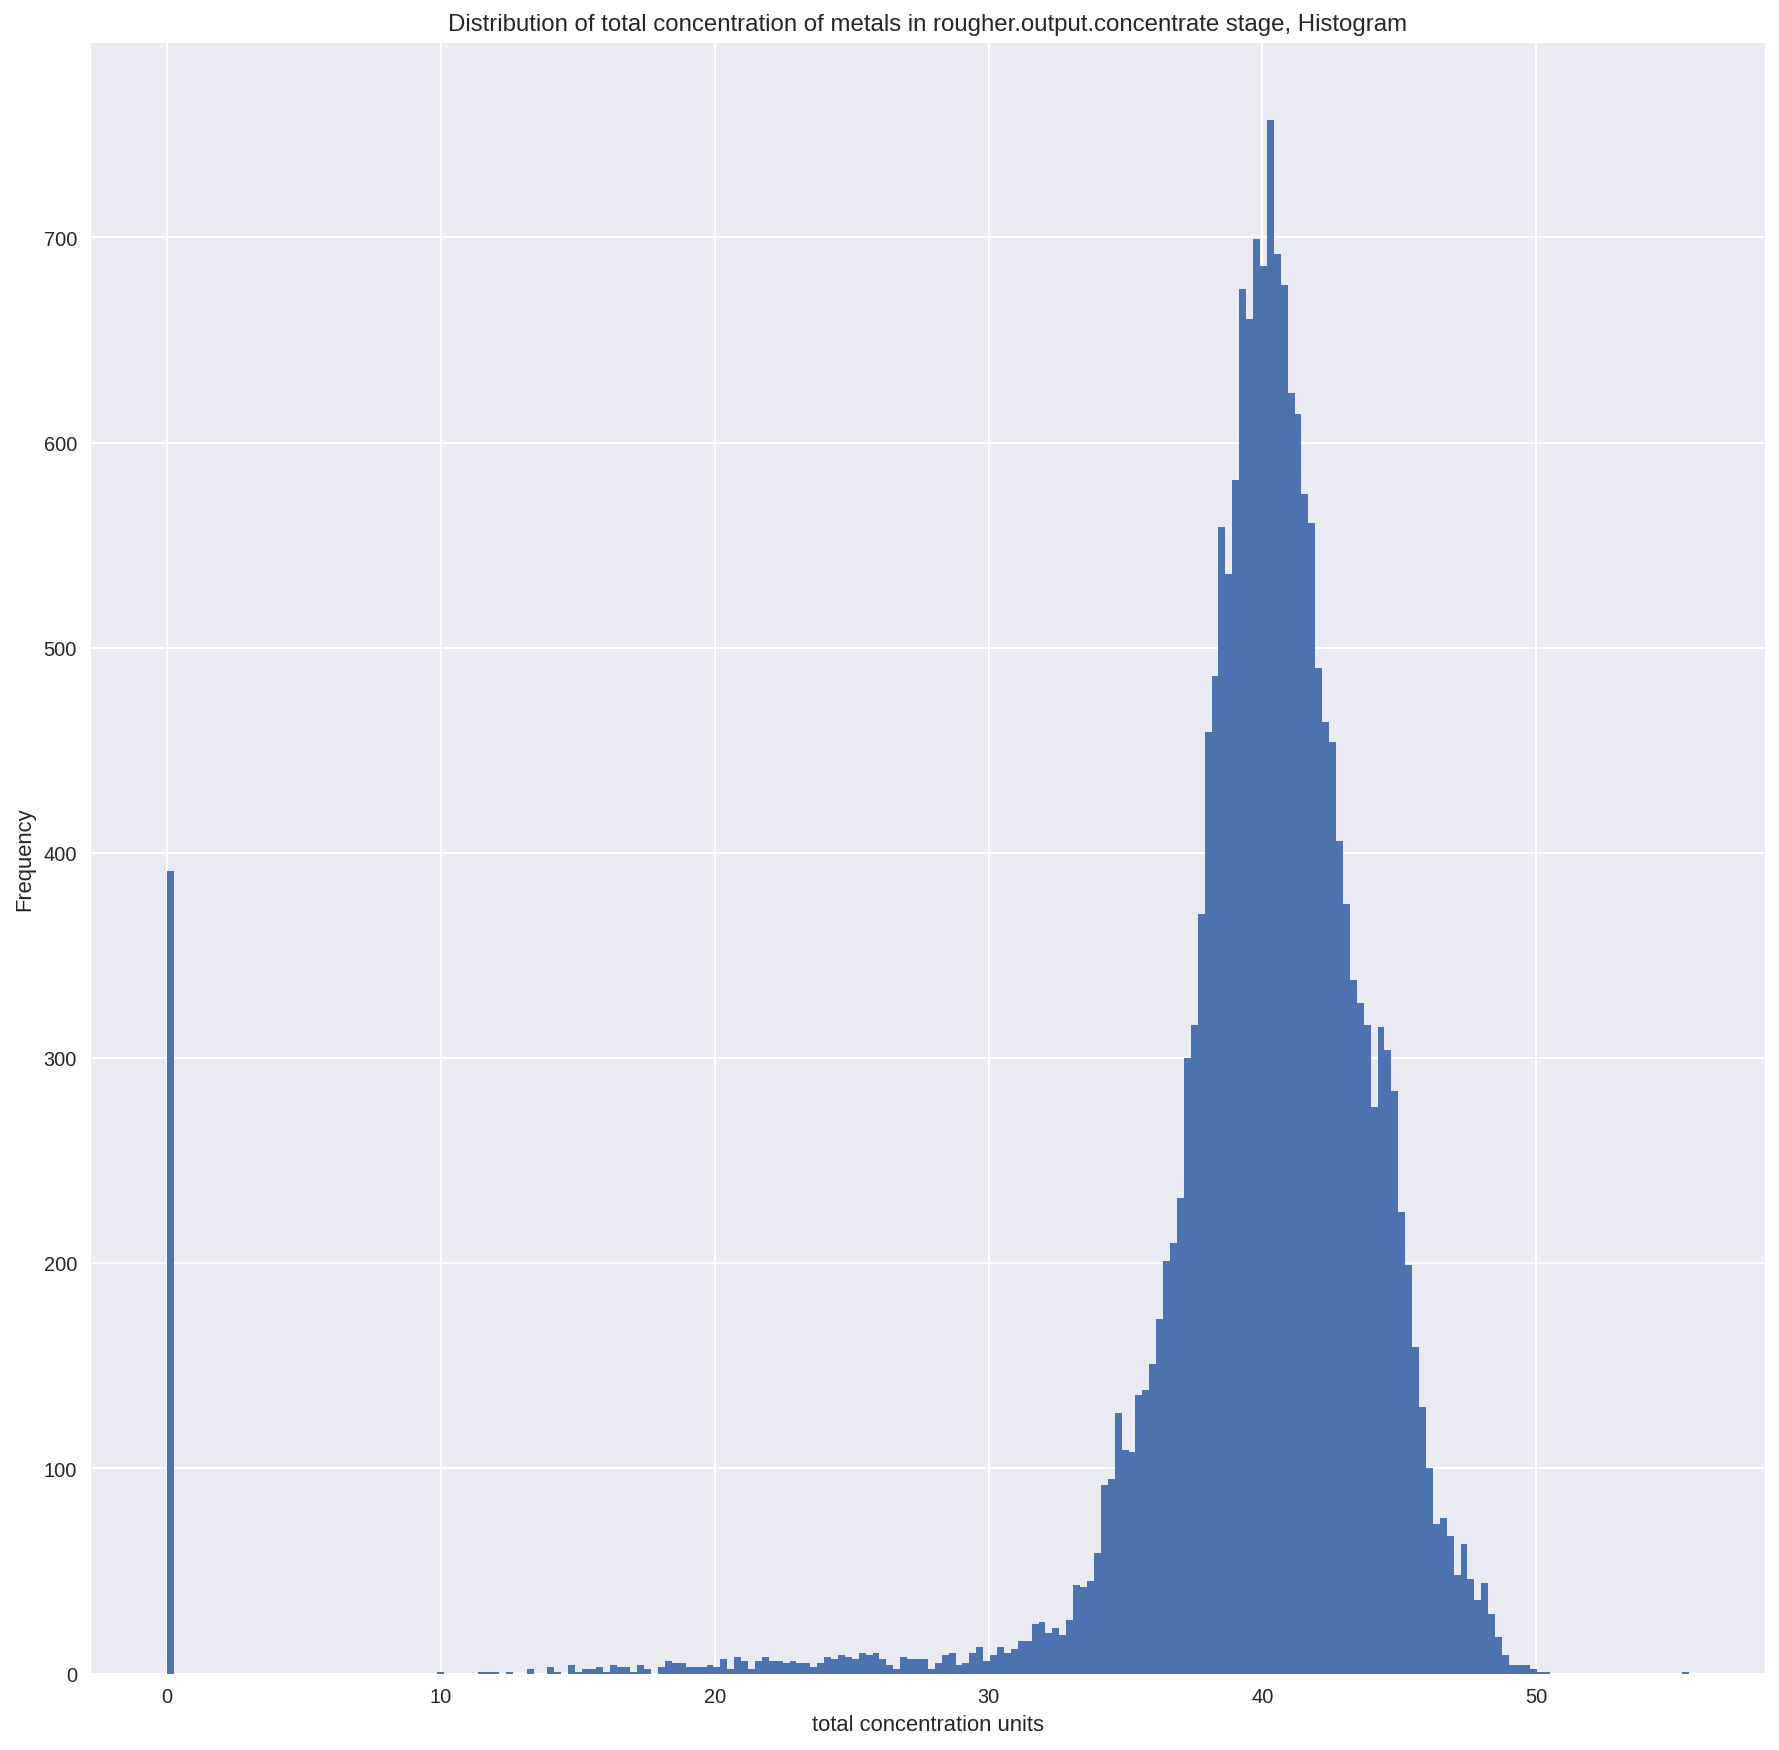

In [38]:
rougher_conc_total_con.plot(kind='hist', figsize=(15,15), bins=220)
plt.xlabel('total concentration units')
plt.title('Distribution of total concentration of metals in rougher.output.concentrate stage, Histogram')
plt.plot()

In [39]:
#checking for outliers in the rougher concentrate total concentration distribution
q1_conc=rougher_conc_total_con.quantile(0.25)
q3_conc=rougher_conc_total_con.quantile(0.75)
iqr_conc=q3_conc - q1_conc 

conc_outliers_upper=rougher_conc_total_con[rougher_conc_total_con > (q3_conc + 1.5*iqr_conc)]
print('conc_outliers_upper',conc_outliers_upper)
print('conc_outliers_upper length',len(conc_outliers_upper))
print()
conc_outliers_lower=rougher_conc_total_con[rougher_conc_total_con < (q1_conc - 1.5*iqr_conc)]
print('conc_outliers_lower',conc_outliers_lower)
print('conc_outliers_lower length',len(conc_outliers_lower))

conc_outliers_upper 2534     49.700943
2535     48.904859
2537     48.632760
2538     49.131082
2918     49.663120
4570     55.568687
5037     49.813797
5850     50.105806
5888     49.334321
6206     49.389640
7627     48.467362
8196     48.640425
8365     48.327563
8397     48.612392
8916     48.451713
8953     49.087290
8955     48.506115
9079     48.452171
9105     48.339445
9106     48.377919
9127     48.735730
9135     48.368050
9137     49.153704
9138     48.802050
9139     49.517910
9140     48.954909
9141     48.908779
9142     48.408209
9143     48.340086
9150     48.360917
9156     48.664277
9159     48.419713
9160     48.773496
9161     48.605629
9162     48.599443
9163     48.726764
9164     48.654467
9165     48.770454
9166     48.560133
9167     48.881489
9194     48.571316
9195     49.263570
9196     48.699916
9197     48.635185
9201     48.450412
9202     48.353722
9211     48.544209
9213     48.539801
9253     48.324143
9261     48.496547
9262     48.355768
9432     48

Based on the distribution of total concentration of metal in the outout.concentrate stage, we found a total of 452 outliers that were smaller and bigger than 1.5*iqr. We decided to remove the rows of these values from the source_data.

In [40]:
outliers_conc_index=conc_outliers_lower.index.append(conc_outliers_upper.index)
outliers_conc_index
source_data.drop(outliers_conc_index, inplace=True)
source_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18472 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                18472 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         18472 non-null  float64       
 2   final.output.concentrate_pb                         18472 non-null  float64       
 3   final.output.concentrate_sol                        18472 non-null  float64       
 4   final.output.concentrate_au                         18472 non-null  float64       
 5   final.output.recovery                               18472 non-null  float64       
 6   final.output.tail_ag                                18472 non-null  float64       
 7   final.output.tail_pb                                18472 non-null  float64       
 8   final.

[]

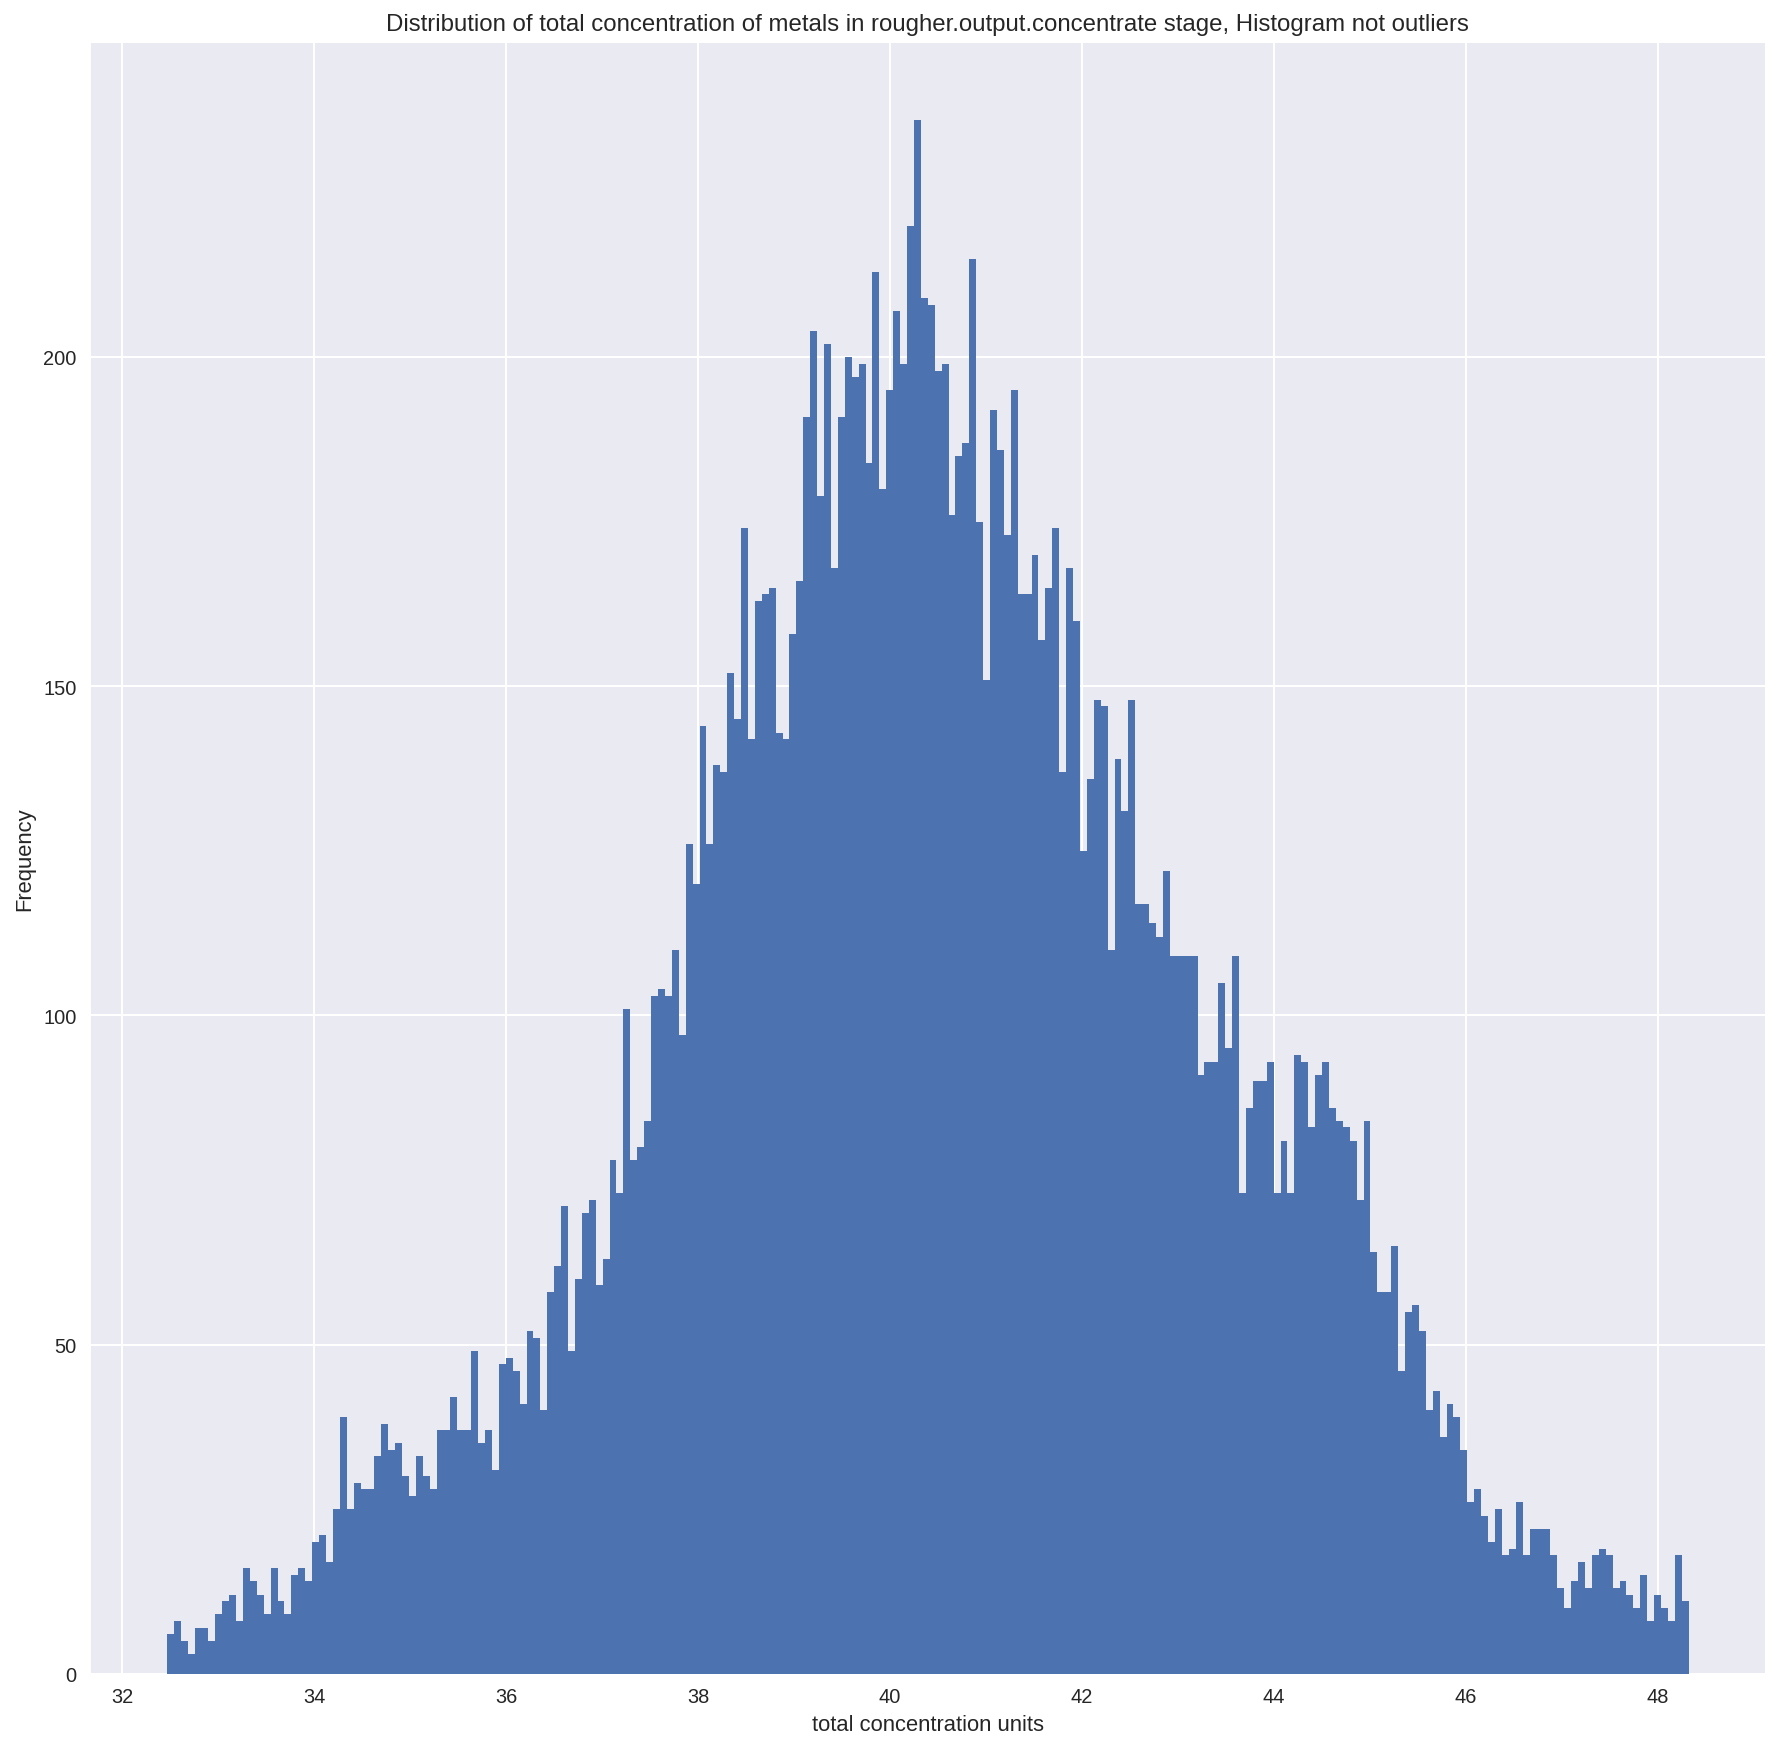

In [41]:
#distribution after removing outliers 
rougher_conc_total_con=source_data['rougher.output.concentrate_ag'] + source_data['rougher.output.concentrate_au'] + source_data['rougher.output.concentrate_pb']
rougher_conc_total_con.plot(kind='hist', figsize=(15,15), bins=220)
plt.xlabel('total concentration units')
plt.title('Distribution of total concentration of metals in rougher.output.concentrate stage, Histogram not outliers')
plt.plot()

##### FInal Concentrate Total  Concentrations
The distribution of the final concentrate total concentrations, for the metals in the souce_data is summarized below. From the description, the distribution presented a mean of 59.26 concentration units; a median value of 60.29 concentration units; and a standard deviation of 5.85 concentration units. The distribution appeared as negatively skewed based on the comparison between mean and median values from distribution. 

In [42]:
final_conc_total_con=source_data['final.output.concentrate_ag'] + source_data['final.output.concentrate_au'] + source_data['final.output.concentrate_pb']
final_conc_total_con.describe()

count    18472.000000
mean        59.468903
std          5.368781
min          0.000000
25%         59.326374
50%         60.315549
75%         61.092470
max         64.968881
dtype: float64

[]

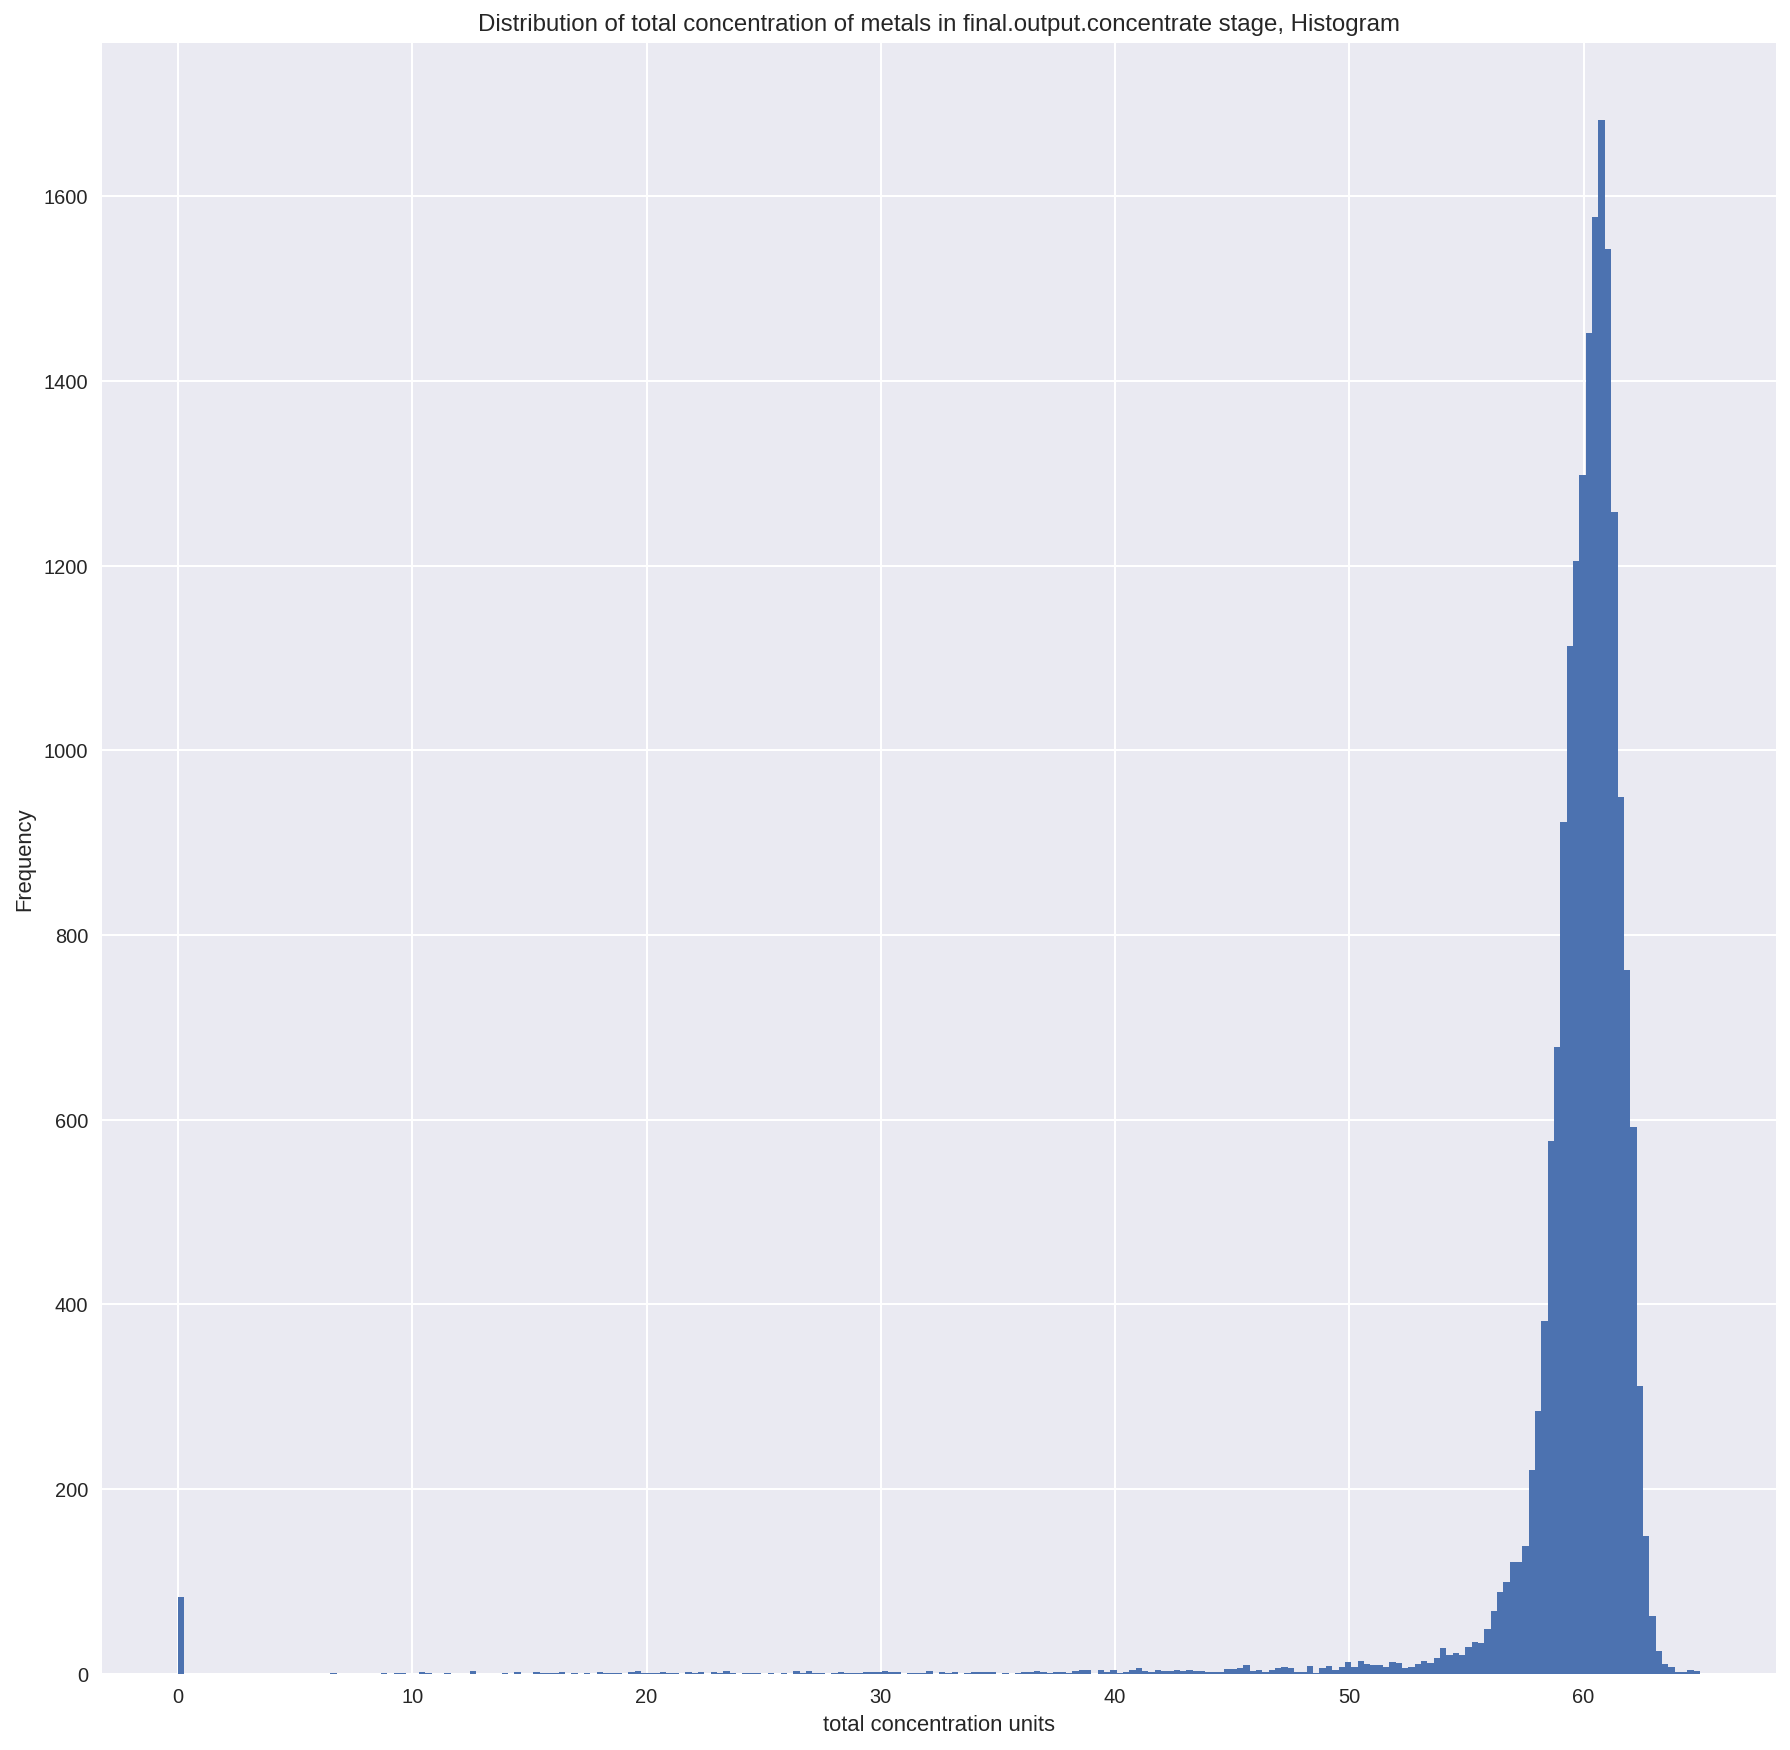

In [43]:
final_conc_total_con.plot(kind='hist', figsize=(15,15), bins=240)
plt.xlabel('total concentration units')
plt.title('Distribution of total concentration of metals in final.output.concentrate stage, Histogram')
plt.plot()

In [44]:
#checking for outliers in the final concentrate total concentration distribution
q1_final=final_conc_total_con.quantile(0.25)
q3_final=final_conc_total_con.quantile(0.75)
iqr_final=q3_final - q1_final

final_outliers_upper=final_conc_total_con[final_conc_total_con > (q3_final + 1.5*iqr_final)]
print('final_outliers_upper',final_outliers_upper)
print('final_outliers_upper length',len(final_outliers_upper))
print()
final_outliers_lower=final_conc_total_con[final_conc_total_con < (q1_final - 1.5*iqr_final)]
print('conc_outliers_lower',final_outliers_lower)
print('conc_outliers_lower length',len(final_outliers_lower))

final_outliers_upper 1871     64.206169
1873     63.897598
1874     63.780850
1875     63.888287
15665    63.809530
18282    63.827222
21519    64.161912
21522    64.968881
21523    64.689573
21524    64.938913
21525    64.520068
21526    64.491435
21527    64.588241
21528    64.856303
dtype: float64
final_outliers_upper length 14

conc_outliers_lower 320      53.082220
398      56.548779
404      56.400900
405      55.234932
406      54.621008
           ...    
22523    10.628137
22533    21.897731
22569    55.682204
22613    56.265766
22626    53.480216
Length: 968, dtype: float64
conc_outliers_lower length 968


Based on the distribution of total concentration of metal in the outout.concentrate stage, we found a total of 984 outliers that were smaller and bigger than 1.5*iqr. We decided to remove the rows of these values from the source_data.

In [45]:
outliers_final_index=final_outliers_lower.index.append(final_outliers_upper.index)
outliers_final_index
source_data.drop(outliers_final_index, inplace=True)
source_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17490 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                17490 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         17490 non-null  float64       
 2   final.output.concentrate_pb                         17490 non-null  float64       
 3   final.output.concentrate_sol                        17490 non-null  float64       
 4   final.output.concentrate_au                         17490 non-null  float64       
 5   final.output.recovery                               17490 non-null  float64       
 6   final.output.tail_ag                                17490 non-null  float64       
 7   final.output.tail_pb                                17490 non-null  float64       
 8   final.

[]

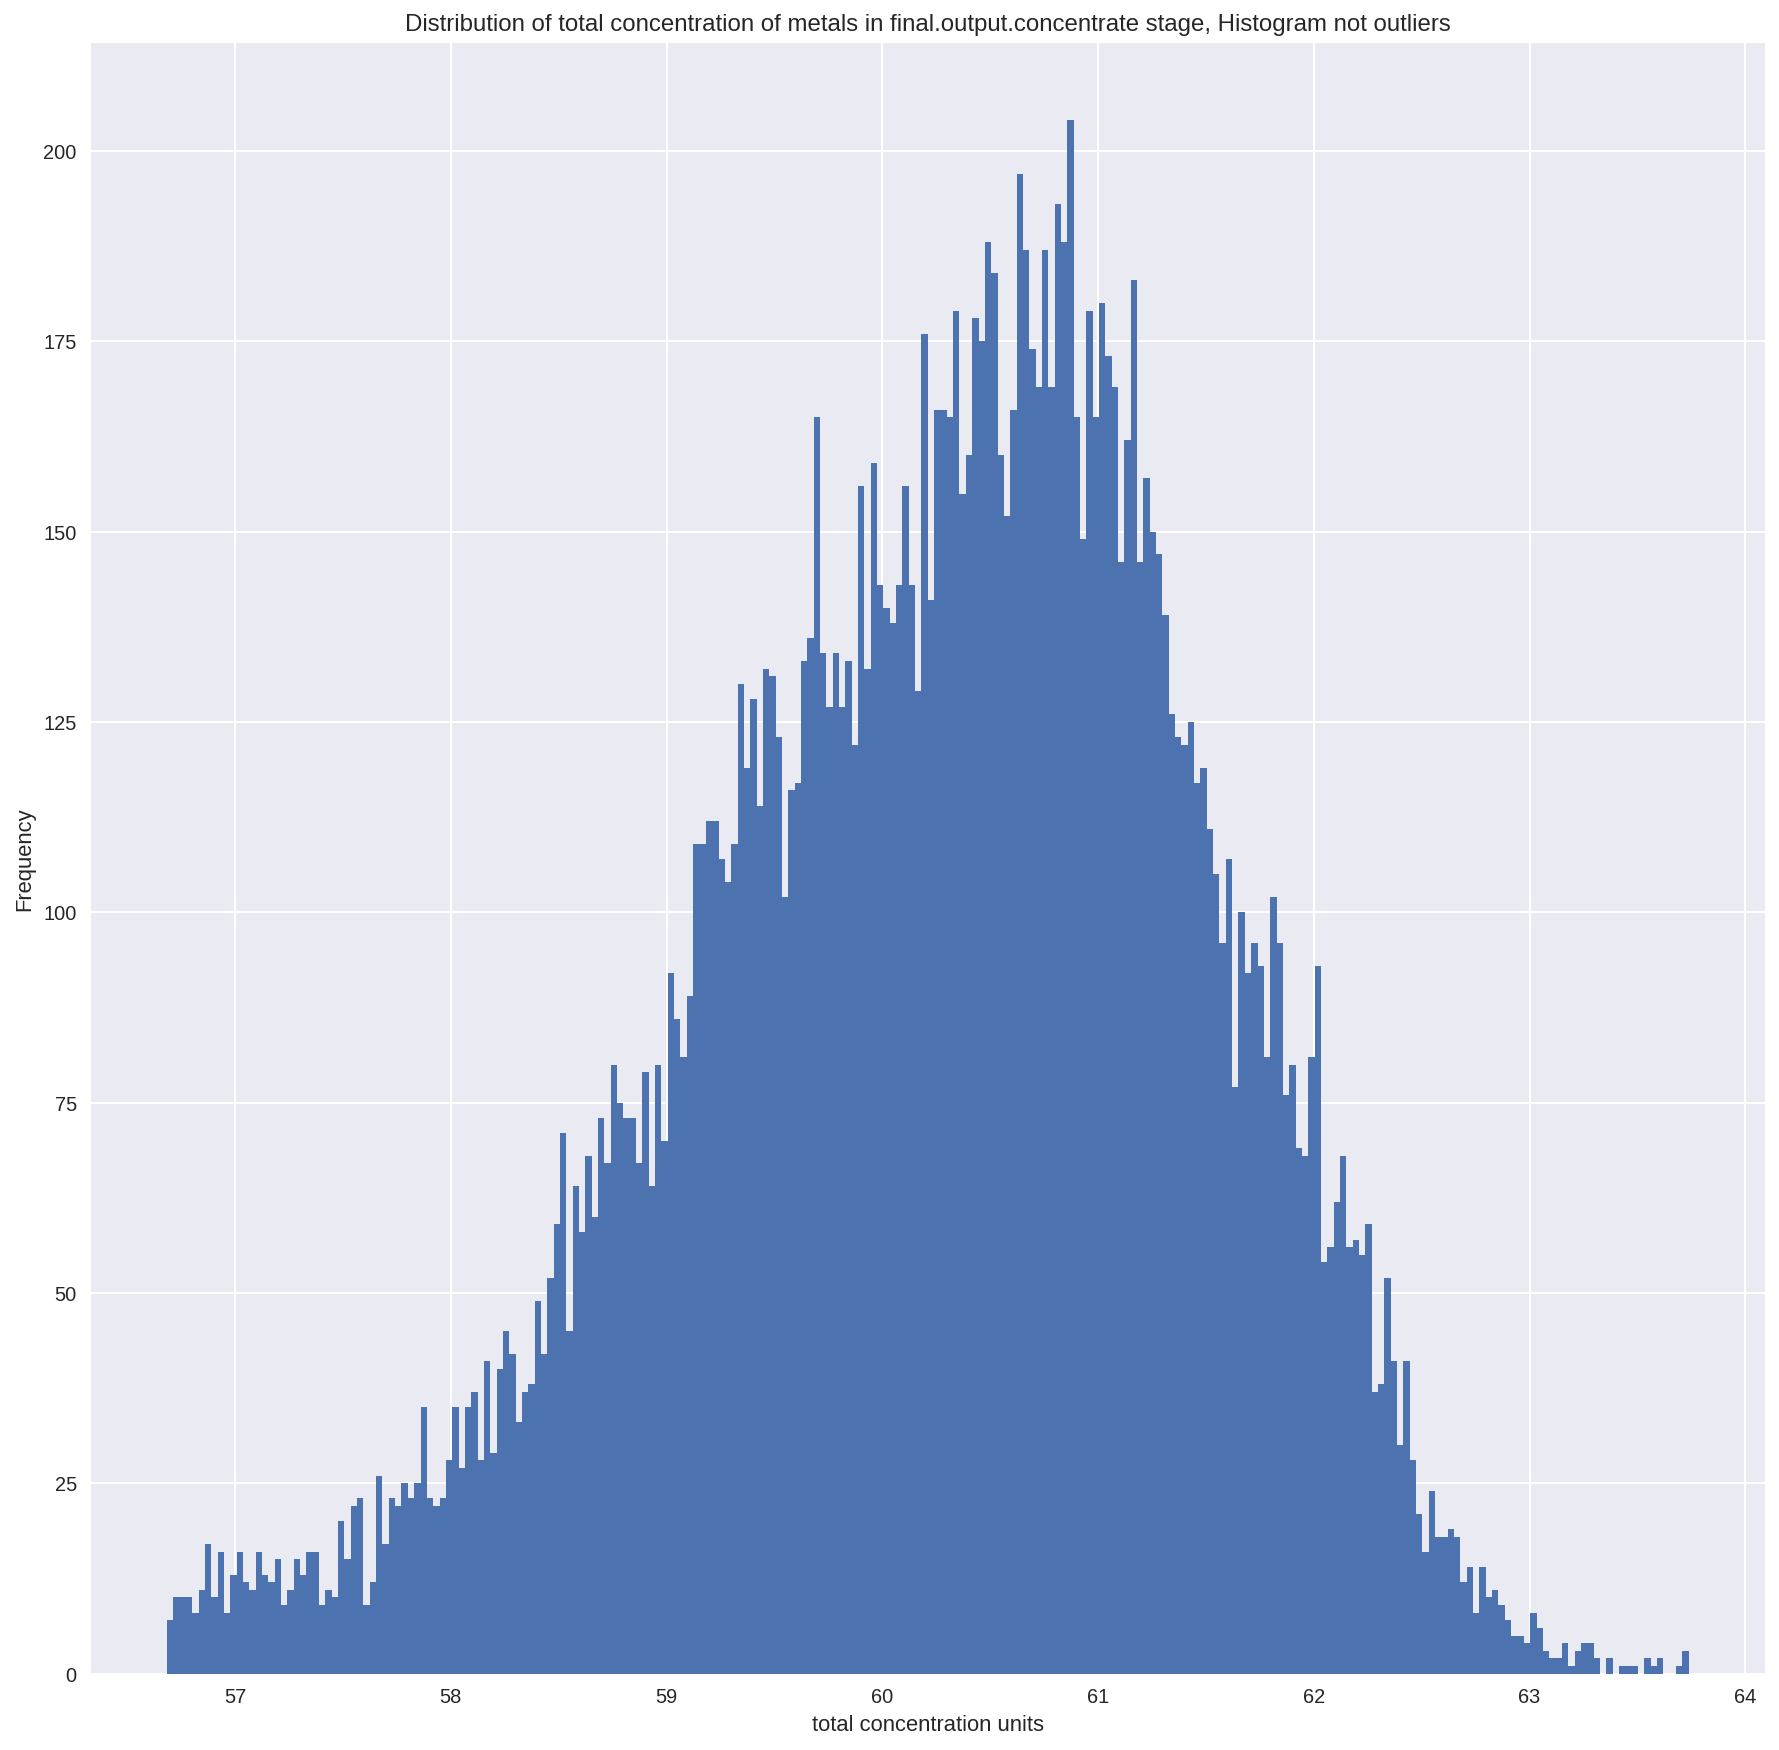

In [46]:
#distribution after removing outliers

final_conc_total_con=source_data['final.output.concentrate_ag'] + source_data['final.output.concentrate_au'] + source_data['final.output.concentrate_pb']

final_conc_total_con.plot(kind='hist', figsize=(15,15), bins=240)
plt.xlabel('total concentration units')
plt.title('Distribution of total concentration of metals in final.output.concentrate stage, Histogram not outliers')
plt.plot()

#### Saving train_data and test_data After Removal of Outliers

In this section, we saved the train_test and the test_data without outliers of total concentration at the stages: raw feed, rougher concentrate, and final concentrate. The ratio of train_data to test_data after the removal of outliers was of 2.67:1. 

In [47]:
train_date=train_data.date.to_list()
train_data=source_data.query('date in @train_date')
train_data.shape

(12712, 87)

In [48]:
test_date=test_data.date.to_list()
test_data=source_data.query('date in @test_date')
test_data.shape

(4778, 87)

In [49]:
#train to test ratio
len(train_data)/len(test_data)

2.6605274173294267

## Models
In this section, we created a LinearRegression and a RandomForestRegressor model to predict the targets: __rougher.output.recovery__ and __final.output.recovery__. To evaluate the models, we selected the final symmetric Mean Absolute Percentage Error (sMAPE) metric, by using the predicted target values and the target values from the train_data. The features were the the columns saved in the variable __features_for_models__. 

In [50]:
#features and target to train the model
features=train_data[features_for_models]
features=features.drop('date', axis=1)
target=train_data[['rougher.output.recovery','final.output.recovery' ]]

print(features.shape)
target.shape

(12712, 52)


(12712, 2)

In this section, we created the sMAPE metric as a function by using the predicted target values (y_pred) and the target values from the train_data (y_true). We also created the sMAPE_final used as scorer for cross validation in our models. 

In [51]:
#sMAPE function
def smape(y_true,y_pred):
    return ((1 / len(y_true)) * sum(2 * abs(y_true - y_pred) / (abs(y_true) + abs(y_pred)))) * 100


#final sMAPE function
def smape_final(y_true,y_pred):
    
    smaper_rougher = smape(y_true.loc[:, 'rougher.output.recovery'].values ,y_pred[:, 0])
    smaper_final = smape(y_true.loc[:, 'final.output.recovery'].values ,y_pred[:, 1])
    return 0.25*smaper_rougher + 0.75*smaper_final

#scoring 
smape_scoring = make_scorer(smape_final, greater_is_better=False)

### Creating LinearRegression Model

In [52]:
#linear regression model 

lr_model= LinearRegression().fit(features,target)
scores_lr=cross_val_score(lr_model,features,target,cv=5,scoring=smape_scoring)
print('scores mean: ', scores_lr.mean())
scores_lr

scores mean:  -9.616732150100354


array([-11.81796725,  -8.23069106,  -7.82822459,  -7.62384104,
       -12.5829368 ])

### DecisionTreeRegressor Model

In [53]:
#DecisionTreeRegressor 

params={
    'min_samples_split' : range(2, 10, 2),
    'max_depth' : range(4, 8, 2)}
g_cv= GridSearchCV(DecisionTreeRegressor(random_state=12345),
                  param_grid=params,
                  scoring=smape_scoring,
                  cv=5)
g_cv.fit(features,target)
best_params=g_cv.best_params_
print(best_params)

dtr_model=DecisionTreeRegressor(**best_params, random_state=12345).fit(features,target)
scores_dtr=cross_val_score(dtr_model, features, target, cv=5, scoring=smape_scoring)
print('scores mean', scores_dtr.mean())
scores_dtr


{'max_depth': 4, 'min_samples_split': 2}
scores mean -9.567263027165527


array([-10.54708118,  -9.41371446,  -8.2346104 ,  -9.54032055,
       -10.10058855])

### RandomForestRegressor Model

In [54]:
#RandomForestRegressor Model 
params_rf = {'min_samples_split' : range(2, 6, 2)}
rf_cv = GridSearchCV(RandomForestRegressor(random_state=12345),
                  param_grid=params_rf,
                  scoring=smape_scoring,
                  cv=5)
rf_cv.fit(features, target)
best_params_rf = rf_cv.best_params_
print(best_params_rf)

rfr_model = RandomForestRegressor(**best_params_rf,
                                 random_state=12345).fit(features,target)
scores_rfr=cross_val_score(rfr_model, features, target, cv=5, scoring=smape_scoring)


{'min_samples_split': 4}


In [55]:
print('scores mean: ',scores_rfr.mean())
scores_rfr

scores mean:  -8.439332623085543


array([-8.46831442, -8.34697928, -6.53384095, -8.85137701, -9.99615146])

### Selecting the Best Model 

Based on our findings, we selected the LinearRegression model because it presented the lowest final sMAPE average value in our evaluation. Therefore, we test this model using the test_data.


In [56]:
features_train=train_data[features_for_models.drop('date')]
target_train=train_data[['rougher.output.recovery','final.output.recovery' ]]
features_test=test_data[features_for_models.drop('date')]
target_test=test_data[['rougher.output.recovery','final.output.recovery' ]]

predictions_test=lr_model.predict(features_test)
#calculating final sMAPE for test_data predictions 

smape_final(target_test, predictions_test)

7.048958255795421

In [57]:
#comparison with simple constant baseline predicting mean

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
predictions_dummy=dummy_regr.predict(features_test)

smape_final(target_test, predictions_dummy)

7.080356972284381

## Conclusion 

From our three models: LinearRegression, DecisionTreeRegressor, and RandomForestRegressor, we found that the best model was the LinearRegressor as it presented the lowest average final sMAPE metric score. Below, the average final sMAPE scores are listed for each of the models: 
- LinearRegression model: 9.61
- DecisionTreeRegressor: 9.56
- RandomForestRegressor: 8.43

After using the RandomForestRegressors model for our test_data, we obtained an average final sMAPE score of 7.04 and our model worked better than a baseline predicting mean by a tiny margin. It's possible that there are some hidden variables we don't have access to, or the data is of poor quality.